In [30]:
import copy,csv,time,nltk,emoji,gensim,string
import pandas as pd
import numpy as np
from tabulate import tabulate
from nltk import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from gensim.models import word2vec
import gensim.models.keyedvectors as word2vec #need to use due to depreceated model
from keras.models import Sequential
from keras.preprocessing import sequence
from keras import models,layers
from keras.layers import Dense,Dropout,LSTM,Activation,Bidirectional,Flatten,Embedding,Conv1D,MaxPooling1D
from keras.optimizers import SGD
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer,one_hot,text_to_word_sequence
from keras.initializers import Constant 
from keras.preprocessing.text import Tokenizer
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score,roc_auc_score,cohen_kappa_score,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,KFold,cross_val_score 
from keras.utils.np_utils import to_categorical
from sklearn.datasets import make_circles
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers.embeddings import Embedding
from tensorflow import set_random_seed
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
from nltk import bigrams, trigrams
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
#using LSTM  works fine
import warnings
import sys
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
warnings.filterwarnings("ignore")  #Ignoring unnecessory warnings
df=pd.read_csv('commentP_consN.csv',delimiter=';',names=['comment'],encoding="utf8")
all=pd.DataFrame(df) #changing to data frame 
print(all)
print(all.info())

                                                comment
0                                     1 ·â†·å£·àù ·ä†·à™·çç ·àµ·à´ ·äê·ãç  
1                     2 ·â†·ãà·àé·äõ ·ãú·àõ ·ä†·àΩ·à≠·àç·äù ·ä•·äî·àõ ·à≥·àã·çà·âÖ·à≠·àÖ ·ä†·àç·âÄ·à®·àÅ·àù
2                                   3 ·åé·â†·ãù ·ä•·äï·â£·ã¨ ·ä†·àç·âÜ·àù ·ä†·àà·äù
3     4 ·ä•·à±·äï ·â†·àò·äì·çà·âÖ ·å†·äï·â∑·àç ·å∏·àé·â≥·â∏·ãç ·àµ·àà·â≥·â∏·ãç ·à∞·àù·àÆ ·ã≠·àò·å£·àç ·åå·â≥·â∏·ãç ·ã´·â†·ã∞...
4     5 ·à∞·àã·àù ·çç·âÖ·à≠ ·çç·âµ·àÖ ·àà·àù·ã™ ·ä¢·âµ·ãÆ·åµ·ã´ ·ã≠·àÅ·äï ·ä°·çç·çç ·ã∞·àû ·ã∞·àµ ·â•·àé·äõ·àç 3·âÄ·äï...
5                                6 ·ä•·â£·ä≠·ãé ·àã·ã≠·ä≠ ·ã≠·å´·äë ·ä®·ã≠·âÉ·à≠·â≥ ·åã
6                               7 ·ä•·åÖ·åç ·â†·å£·àù ·ã∞·àµ ·ã®·àö·àç·ç£ ·àµ·à´ ·äê·ãç
7     8 ·à≤·ãò·çç·äï ·â†·à´·à± ·àã·â• ·å†·â• ·ä•·ã´·àà ·äê·ãç ·ä†·ã≠·à∞·àô·âµ·àù ·ä•·åÇ ·ä•·äê ·ä•·äï·âµ·äì ·â¢·à∞·àô·âµ...
8                   9 ·ä†·â¶ ·â∞·â£·à®·ä≠ ·ã®·ä•·ãç·äê·âµ ·ã®·àÄ·åà·à≠ ·çç·âÖ·à≠ ·ã´·àà·ãç ·à∞·ãç ·äê·àÖ 
9                   

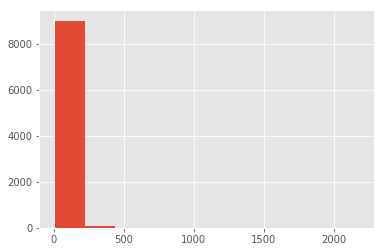

None
count    9138.000000
mean       43.936638
std        65.004874
min         5.000000
25%        18.000000
50%        30.000000
75%        51.000000
max      2179.000000
dtype: float64
0                                       1 ·â†·å£·àù ·ä†·à™·çç ·àµ·à´ ·äê·ãç  
1                       2 ·â†·ãà·àé·äõ ·ãú·àõ ·ä†·àΩ·à≠·àç·äù ·ä•·äî·àõ ·à≥·àã·çà·âÖ·à≠·àÖ ·ä†·àç·âÄ·à®·àÅ·àù
2                                     3 ·åé·â†·ãù ·ä•·äï·â£·ã¨ ·ä†·àç·âÜ·àù ·ä†·àà·äù
3       4 ·ä•·à±·äï ·â†·àò·äì·çà·âÖ ·å†·äï·â∑·àç ·å∏·àé·â≥·â∏·ãç ·àµ·àà·â≥·â∏·ãç ·à∞·àù·àÆ ·ã≠·àò·å£·àç ·åå·â≥·â∏·ãç ·ã´·â†·ã∞...
4       5 ·à∞·àã·àù ·çç·âÖ·à≠ ·çç·âµ·àÖ ·àà·àù·ã™ ·ä¢·âµ·ãÆ·åµ·ã´ ·ã≠·àÅ·äï ·ä°·çç·çç ·ã∞·àû ·ã∞·àµ ·â•·àé·äõ·àç 3·âÄ·äï...
5                                  6 ·ä•·â£·ä≠·ãé ·àã·ã≠·ä≠ ·ã≠·å´·äë ·ä®·ã≠·âÉ·à≠·â≥ ·åã
6                                 7 ·ä•·åÖ·åç ·â†·å£·àù ·ã∞·àµ ·ã®·àö·àç·ç£ ·àµ·à´ ·äê·ãç
7       8 ·à≤·ãò·çç·äï ·â†·à´·à± ·àã·â• ·å†·â• ·ä•·ã´·àà ·äê·ãç ·ä†·ã≠·à∞·àô·âµ·àù ·ä•·åÇ ·ä•·äê ·ä•·äï·

In [31]:
#describition before preprocessing 
reviews_len = [len(x) for x in df['comment']]
pd.Series(reviews_len).hist()
print(plt.show())
print(pd.Series(reviews_len).describe())
#df['tokenized_sents']= df.apply(lambda row: nltk.word_tokenize(row['comment']), axis=1)
#df['sents_length'] = df.apply(lambda row: len(row['tokenized_sents']),axis=1)
#print(df[['tokenized_sents','sents_length']])
#print("sum of words is",sum(df['sents_length']))
#print("the maximum sents length is",df['sents_length'].max())
#for considering Emojis 
#df['comment'] = [''.join(c for c in s if c not in string.punctuation) for s in df['comment']]
print(df['comment']) 
#removing whitespaces(remove leading and ending spaces)
#df['comment'] = df['comment'].str.strip()
#print("removing white spaces")
#print(df[['comment']].head())
#remove digits 
df['comment'] = df['comment'].str.replace('\d+', '')
#print(df[['comment']])
#the following is normalization of words and characters
df['comment'] = df['comment'].replace(regex={"·ãê":"·ä†","·ãë":"·ä°","·ãí":"·ä¢","·ãì":"·ä†","·ãî":"·ä§","·ãï":"·ä•","·ãñ":"·ä¶",
                                            "·ãì":"·ä†","·äΩ":"·àÖ","·àÉ":"·àÄ","·ãâ":"·ãç",
                                            "·å∏":"·çÄ","·åπ":"·çÅ","·å∫":"·çÇ","·åª":"·çÉ","·åº":"·çÑ","·åΩ":"·çÖ","·åæ":"·çÜ",
                                             "·äÉ":"·àÄ","·äÅ":"·àÅ","·äÇ":"·àÇ","·äÉ":"·àÄ","·äÑ":"·àÑ","·äÖ":"·àÖ","·äÜ":"·àÜ",
                                             "·à†":"·à∞","·à°":"·à±","·à¢":"·à≤","·à£":"·à≥","·à§":"·à¥","·à•":"·àµ","·à¶":"·à∂",
                                            "·àê":"·àÄ","·àë":"·àÅ","·àí":"·àÇ","·àì":"·àÄ","·àî":"·àÑ","·àï":"·àÖ","·àñ":"·àÜ",                                             
                                             "·äÆ·àò·äï·âµ":"·ä†·àµ·â∞·ã´·ã®·âµ","·àô·â≠":"·çä·àç·àù","·ä¢·âµ·ãÆ·åΩ·ã´":"·ä¢·âµ·ãÆ·åµ·ã´","·ä¢·âµ·ã¨":"·ä¢·âµ·ãÆ·åµ·ã´",
                                             "·ä¢·â≤·ãÆ·çí·ã´":"·ä¢·âµ·ãÆ·åµ·ã´","·çç·àç·àù":"·çä·àç·àù","·â†·å†·àù":"·â†·å£·àù","1·äõ":"·ä†·äï·ã∞·äõ","·ã≠·àò·âΩ·ä≠":"·ã≠·àò·âΩ·àÖ",
                                             "·ã≠·àÅ·äï·àã·âπ":"·ã≠·àÅ·äï·àã·âΩ·àÅ","·ä†·à®":"·ä•·à®","·àã·ã≠·ä≠":"·ãâ·ã∞·ãµ","·çç·âÖ·à≠·à≠·à≠":"·çç·âÖ·à≠","·çç·âÖ·à≠·à≠":"·çç·âÖ·à≠",
                                             "·àÄ·à™·çç":"·ä†·à™·çç","·àÄ·à™·çà":"·ä†·à™·çç","·à∞·ãç·ã∞·ãà":"·àµ·ãà·ã∞·ãç","·ãã·ãç·ãç·ãç·ãç":"·ãã·ãç","·ä°·çç·çç·çç·çç·çç·çç·çç":"·ä°·çç·çç","·ä°·çç·çç·çç·çç·çç·çç":"·ä°·çç·çç",
                                             "·ä°·çç·çç·çç·çç·çç":"·ä°·çç·çç","·ä°·çç·çç·çç":"·ä°·çç","·ãç·ãµ·ãµ·ãµ·ãµ·ãµ":"·ãç·ãµ·ãµ",
                                            "·ãç·ãµ·ãµ·ãµ·ãµ":"·ãç·ãµ·ãµ","·ãç·ãµ·ãµ·ãµ":"·ãç·ãµ·ãµ","1·äõ":"·ä†·äï·ã∞·äõ","·ä¢·âµ·ã©·â¢·ã´·ãä":"·ä¢·âµ·ãÆ·åΩ·ã´·ãä"})
print(df[['comment']])
#removing htmls from each comment
df['comment']=df['comment'].replace('{html}',"")
#removing punctuations and Emojis
df['comment'] = df['comment'].str.replace('[^\w\s]','')
freq = pd.Series(' '.join(df['comment']).split()).value_counts()[-10:] 
for index, row in df.iterrows():
     row=df['comment']==""
     index_no=df.index[row] #display index numbers(rows) that have element(values) 
aa=df['comment'].drop(index_no,axis=0)
aa.to_csv('output.csv', index=False, header=None)
df=pd.read_csv('output.csv',delimiter=';',names=['comment'],encoding="utf-8")
afteremojiR=pd.DataFrame(df) #changing to data frame
print(afteremojiR)

In [32]:
#tokenizing of the comments 
df['tokenized_sents']= df.apply(lambda row: nltk.word_tokenize(row['comment']), axis=1)
#print("tokenized sents are")
# removing na values(containing empty values)
df['tokenized_sents'].replace('', np.nan, inplace=True)
#print(tabulate(dft['tokenized_sents']))
frequency=df['tokenized_sents']
#stop = stopwords.words('Amharic')
#df['stopwords'] = df['tokenized_sents'].apply(lambda x: len([item for item in x if item in stop]))
#df['tokenized_sents']=df['tokenized_sents'].apply(lambda x: [item for item in x if item not in stop])

In [33]:
df['sents_length'] = df.apply(lambda row: len(row['tokenized_sents']),axis=1)
print(df[['tokenized_sents','sents_length']])
print("sum of words is",sum(df['sents_length']))
print("the maximum sents length is",df['sents_length'].sum())
df4=df['tokenized_sents']
#print("df4 is,",df4)
df5=pd.Series.to_frame(df4) #to change series to frame'
df5.columns=['tokenized_sents']
#dfp=pd.read_csv('positive_emoji.csv',delimiter=';',names=['positive_emoji'],encoding="utf8")
#dfn=pd.read_csv('negative_emoji.csv',delimiter=';',names=['negative_emoji'],encoding="utf8")
df2=pd.read_csv('Negative.csv',names=['negative'],encoding="utf8")
df7=pd.read_csv('positive.csv',names=['positive'],encoding="utf8")
df8=pd.read_csv('Invertor.csv',names=['Invertor'],encoding="utf8")
df9=pd.read_csv('intensifierA.csv',names=['intensifier'],encoding="utf8")
columen_names=['negative','positive','Invertor','intensifierA']
result=pd.concat([df2,df7,df8,df9],axis=1,join='outer',sort=False,names=columen_names)
blankIndex=[''] * len(result)
result.index=blankIndex
#print(tabulate(result))
#information about lexicons 
print("number of positive lexicon",df8.info())
print("number of negative lexicon",df9.info())

                                        tokenized_sents  sents_length
0                                    [·â†·å£·àù, ·ä†·à™·çç, ·àµ·à´, ·äê·ãç]             4
1                [·â†·ãà·àé·äõ, ·ãú·àõ, ·ä†·àΩ·à≠·àç·äù, ·ä•·äî·àõ, ·à≥·àã·çà·âÖ·à≠·àÖ, ·ä†·àç·âÄ·à®·àÅ·àù]             6
2                                [·åé·â†·ãù, ·ä•·äï·â£·ã¨, ·ä†·àç·âÜ·àù, ·ä†·àà·äù]             4
3     [·ä•·à±·äï, ·â†·àò·äì·çà·âÖ, ·å†·äï·â∑·àç, ·çÄ·àé·â≥·â∏·ãç, ·àµ·àà·â≥·â∏·ãç, ·à∞·àù·àÆ, ·ã≠·àò·å£·àç, ·åå·â≥...            10
4     [·à∞·àã·àù, ·çç·âÖ·à≠, ·çç·âµ·àÖ, ·àà·àù·ã™, ·ä¢·âµ·ãÆ·åµ·ã´, ·ã≠·àÅ·äï, ·ä°·çç·çç, ·ã∞·àû, ·ã∞·àµ, ...            15
5                            [·ä•·â£·ä≠·ãé, ·ãâ·ã∞·ãµ, ·ã≠·å´·äë, ·ä®·ã≠·âÉ·à≠·â≥, ·åã]             5
6                           [·ä•·åÖ·åç, ·â†·å£·àù, ·ã∞·àµ, ·ã®·àö·àç, ·àµ·à´, ·äê·ãç]             6
7     [·à≤·ãò·çç·äï, ·â†·à´·à±, ·àã·â•, ·å†·â•, ·ä•·ã´·àà, ·äê·ãç, ·ä†·ã≠·à∞·àô·âµ·àù, ·ä•·åÇ, ·ä•·äê, ·ä•...            15
8             [·ä†·â¶, ·â∞·â£·à®·ä≠, ·

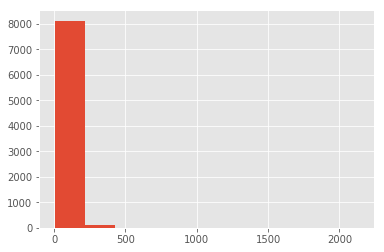

None
count    8237.000000
mean       41.810004
std        66.558628
min         3.000000
25%        15.000000
50%        28.000000
75%        48.000000
max      2137.000000
dtype: float64


In [34]:
positive_count=0
negative_count=0
invertor_count=0
intensifier_count=0
pos_emoji=0
positive_emoji_count=0
negative_emoji_count=0
emoji_score=0
#review length analysis used to include or exclude very short or lengthy statements
reviews_len = [len(x) for x in df['comment']]
pd.Series(reviews_len).hist()
print(plt.show())
print(pd.Series(reviews_len).describe())
df10 = pd.DataFrame(columns=['polarity'])
def extract_emoji(str):
            return ''.join(c for c in str if c in emoji.UNICODE_EMOJI)
positive_emoji=['üòÇ','‚ù§','‚ô•','üòç','üòò','üòä','üëå','üíï','üëè','üòÅ','‚ò∫','‚ô°','üëç','üôè','‚úå','üòè',
                'üòâ','üôå','üôà','‚àö', '‚ù§Ô∏è','‚ô•Ô∏è','‚ô•Ô∏è','‚ù§Ô∏è',
'üí™','üòÑ','üòÉ','üò±','üéâ','üòú','üå∏','üíú','üíô','üò≥','üíó','‚òÄ','üòé','üò¢','üíã','üòã','üôä','üé∂','üíû','üíù'
'üòå','üíØ','üíõ','üíÅ','üíö','üòÜ','üòù','üòÖ','üëä','üòÄ','üòö','üòª','üíò','üëã','‚úã','üéä','‚ùÑ','üò•','üòà',
'üîù','üò∞','‚öΩ','üëë','üòπ','üçÉ','üéÅ','üêß','üéà','‚úä','üí§','üíì','üí¶','üôã','üéÑ','üéµ','üòõ','üò¨','üëØ',
'üíé','üéÇ','üë´','üèÜ','‚òù','üòô','‚õÑ','üëÖ','‚ô™','üçÇ','üíè','üå¥','üëà','üåπ','üôÜ','üí∞','üçª''üåû','üçÅ','‚≠ê',
'üéÄ','üôâ','üíÖ','üå∫','üê∂','üåö','üé§','üë≠','üéß','üëÜ','üç∏','üòá','üçâ','üé∏','üçπ','üí´','üìö','üå∑','üíù',
'üí®','üèà','üíç','‚òî','üë∏','üá™','üò∏','üçî','üëº','üêØ','üòµ','üë∂','üíê','‚Üæ','üìñ','üêí','üåç','‚îä','üê•','üíÑ',
'üí∏','‚õî','üèÄ','üíâ','üíü','üòØ','‚ô¶','üåô','üêü','üë£','üóø','üçù','üç≠','‚ùå','üê∞','üíä','üö®','üç™','‚úß','üéÜ',
'üéé','üá©','‚úÖ','üîä','üë†','üåå','üçé','üêª','üíá','üçä','üçí','üê≠','üëü','üåé','üçç','üêÆ','üì≤','üåÖ','üá∑','üåΩ',
'üç¨','üò∫','üöÄ','¬¶üçß','üçú','üÜó','üçã','‚û§','üèÑ','üëß','üêè','‚úè','üåæ','üè°','üëô','‚õÖ','üçÖ','üì∫','üêç','üáÆ',
'‚ô£üáπ','üê¨','üå≥','üíø','üîê','üê®','üåï','üîµ','üç≥','üö¥','üë∞','‚öì','üëó','‚ûï','üí¨','üîú','üç®','üçô','üçó','üç≤',
'üòº','üêô','üë®','üçö','üçñ','‚ô®‚ñÉ','üöò']
negative_emoji=['üò≠',' üò©','üòí','üíñ','üòî','üò°','üò¥','üî´','üòû','üò™',' üò´','üíÄ','üòï',
'üíî','üò§','üòë','üò†','üòì','üò£','üò≤','üòø','üòê' 'üò®','üò∑','üëé','üí©','üôÖ','üò∂','üî™','üíÉ',
                'üëø','‚úÇ','üë™','üò¶','üç£','üôç','üíß','üòæ','üç•','üò≠']  

In [35]:
for (index_label, row_series) in df5.iterrows():
    #print('Row Index label : ', index_label)
    #print('Row Content as Series : ', row_series.values)
    #Series.array(row_series.values())
    list=row_series.values  #accessing the row values
    for i in range(len(list)):
         #print(list[i])
        ll=len(list[i])
        #print(ll)
        li=list[i]
        print(li)              #if df2['negative'].isin(li[j]) 
        xx=extract_emoji(li)
        #print(xx)    
        y=[]
        for s in xx:
            y.append(s)
            ''.join(y)
        #print(y)
        pos_emojiexist=[]
        neg_emojiexist=[]
        for element in positive_emoji:
            for word in y:
                pos_emojiexist.append(word in element)
                positive_emoji_count=sum(pos_emojiexist)
        for item in negative_emoji:
            for word in y:
                neg_emojiexist.append(word in item)
                negative_emoji_count=sum(neg_emojiexist)
        if len(y)!=0:
            emoji_score=positive_emoji_count-negative_emoji_count
        else:
            emoji_score=0
        positive_res=result.positive.isin(li)
        negative_res=result.negative.isin(li)
        invertor_res=result.Invertor.isin(li)
        intensifierA_res=result.intensifier.isin(li)
        positive_count=sum(positive_res)*2
        negative_count=sum(negative_res)*2
        invertor_count=sum(invertor_res)
        intensifier_count=sum(intensifierA_res)
        sentiment_score=positive_count-negative_count
        if invertor_count>0 and intensifier_count==0 and sentiment_score>0 and  ll>0:
            sentiment=-(sentiment_score)
        if invertor_count>0 and intensifier_count==0 and sentiment_score<0  and ll>0:
            sentiment=-(sentiment_score)
        if intensifier_count>0 and invertor_count==0 and sentiment_score>0  and ll>0:
            sentiment=sentiment_score+3
        if intensifier_count> 0 and invertor_count==0 and sentiment_score <0 and ll>0:
            sentiment=sentiment_score-3
        if invertor_count==0 and intensifier_count==0 and sentiment_score >0 and ll>0:
            sentiment=sentiment_score
        if invertor_count==0 and intensifier_count==0 and sentiment_score <0 and   ll>0:
            sentiment=sentiment_score
        if intensifier_count> 0 and invertor_count> 0 and sentiment_score>0  and ll>0:
            sentiment=-(sentiment_score)+3
        if intensifier_count> 0 and invertor_count> 0 and sentiment_score<0 and ll>0:
            sentiment=-(sentiment_score)-3
        if intensifier_count> 0 and invertor_count==0 and sentiment_score==0 and ll>0:
             sentiment=sentiment_score
        if sentiment_score==0 and invertor_count==0 and intensifier_count==0 and ll>0:
             sentiment=sentiment_score
        if sentiment>0 and emoji_score>=0:
            print("positive")
            df10 = df10.append({'polarity': "positive"}, ignore_index=True)
        if sentiment==0 and emoji_score>0:
            print("positive")
            df10 = df10.append({'polarity': "positive"}, ignore_index=True)
        if sentiment<0 and emoji_score<=0:
            print("negative")
            df10 = df10.append({'polarity': "negative"}, ignore_index=True)
        if sentiment==0 and emoji_score<0:
            print("negative")
            df10 = df10.append({'polarity': "negative"}, ignore_index=True)
        if sentiment<0 and emoji_score>0:#no change word first
            print("negative")
            df10 = df10.append({'polarity': "negative"}, ignore_index=True)
        if sentiment > 0 and emoji_score<0: #word first
            print("positive")
            df10 = df10.append({'polarity': "positive"}, ignore_index=True)
        if sentiment==0 and emoji_score==0:
            print("neutral")
            df10 = df10.append({'polarity': "neutral"}, ignore_index=True)
        if ll==0:
            print("neither")            
#print(df10)
df11=pd.concat([df4,df10],axis=1,join='inner',sort=False)  
#print(df11)  

['·â†·å£·àù', '·ä†·à™·çç', '·àµ·à´', '·äê·ãç']
positive
['·â†·ãà·àé·äõ', '·ãú·àõ', '·ä†·àΩ·à≠·àç·äù', '·ä•·äî·àõ', '·à≥·àã·çà·âÖ·à≠·àÖ', '·ä†·àç·âÄ·à®·àÅ·àù']
positive
['·åé·â†·ãù', '·ä•·äï·â£·ã¨', '·ä†·àç·âÜ·àù', '·ä†·àà·äù']
positive
['·ä•·à±·äï', '·â†·àò·äì·çà·âÖ', '·å†·äï·â∑·àç', '·çÄ·àé·â≥·â∏·ãç', '·àµ·àà·â≥·â∏·ãç', '·à∞·àù·àÆ', '·ã≠·àò·å£·àç', '·åå·â≥·â∏·ãç', '·ã´·â†·ã∞·äê·ãç', '·â†·à≠·â≥']
positive
['·à∞·àã·àù', '·çç·âÖ·à≠', '·çç·âµ·àÖ', '·àà·àù·ã™', '·ä¢·âµ·ãÆ·åµ·ã´', '·ã≠·àÅ·äï', '·ä°·çç·çç', '·ã∞·àû', '·ã∞·àµ', '·â•·àé·äõ·àç', '·âÄ·äï', '·âÄ·à®·äù', '·àÄ·åà·à¨', '·ã±·âÖ', '·àç·àç']
positive
['·ä•·â£·ä≠·ãé', '·ãâ·ã∞·ãµ', '·ã≠·å´·äë', '·ä®·ã≠·âÉ·à≠·â≥', '·åã']
neutral
['·ä•·åÖ·åç', '·â†·å£·àù', '·ã∞·àµ', '·ã®·àö·àç', '·àµ·à´', '·äê·ãç']
positive
['·à≤·ãò·çç·äï', '·â†·à´·à±', '·àã·â•', '·å†·â•', '·ä•·ã´·àà', '·äê·ãç', '·ä†·ã≠·à∞·àô·âµ·àù', '·ä•·åÇ', '·ä•·äê', '·ä•·äï·âµ·äì', '·â¢·à∞·àô·âµ', '·àù·à≠·å•', '·âÖ·äî', '·äê·â†·à≠', '·ã®·äê·åà·à®·âª·â∏·ãç']
positive
['·ä†·â¶', '·â∞·â£·

['·ãã·ãç', '·â†·å£·àù', '·ã´·àù·à´·àç', '·ãç·ãµ·ãµ']
positive
['·ã´·à®·åÄ', '·çä·àç·àù', '·ä§·å≠', '·ä†·ã≠·äì·âΩ·äï', '·ã®·äì·äï·â∞', '·àò·âÄ·àà·åÉ', '·ã≠·àÅ·äï']
negative
['·ä•·äì', '·àò·à≥·à™·ã´', '·ã®·àö·àà·ãç', '·â†·å£·àù', '·â∞·àò·âΩ·â∂·äõ·àç', '·ä≠·ä≠·ä≠']
positive
['·àÅ·àå', '·â¢·â≥·ã≠', '·ã®·àõ·ã≠·å†·åà·â•', '·äê·ãç', '·ã®·ä•·ãç·äê·âµ']
positive
['·ã≠·àò·âª·âΩ·àÅ', '·ã®·äî', '·àù·à≠·å¶·âΩ', '·ãç·ãµ·ãµ']
positive
['·ä†·à™·çç', '·çä·àç·àù', '·äê·ãç']
positive
['·â†·àµ·äï·âµ', '·ä†·àò·â¥', '·ã∞·åç·àú', '·àç·ã®·ãç', '·ä•·àµ·ä™', '·å•·à©', '·äê·åà·à≠', '·àò·âº·àù', '·ä†·ã≠·à∞·àà·âΩ·àù']
positive
['·ä•·àµ·ä´·àÅ·äï', '·ãµ·à®·àµ', '·ä•·äï·ã∞', '·ãà·äï·ã∂·âΩ', '·åâ·ã≥·ã≠', '·ã®·àö·ã´·àµ·âÖ', '·çä·àç·àù', '·ä†·àã·ã®·àÅ·àù', '·ãà·ã∞·çä·âµ·àù', '·ä•·àö·äñ·à≠', '·ä†·ã≠·àò·àµ·àà·äù·àù']
neutral
['·ä†·â¶', '·ã≠·àò·âª·âΩ·àÅ', '·ä†·à´·ã∂·âΩ']
positive
['·ã∞·àµ', '·ã®·àö·àç', '·ã®·àö·ã´·ãù·äì·äì']
positive
['·ä≠·ä≠·ä≠', '·ãç·ã≠', '·àµ·ãà·ã≥·âΩ·àÅ']
positive
['·ä†·ã≠', '·à∏·ãã', '·çà·à´·àÅ', '·ä•

['·ãã·ãç']
positive
['·ã∞·àµ', '·ã≠·àã·àç']
positive
['·â†·å£·àù', '·ã∞·àµ', '·ã≠·àã·àç', '·â†·à≠·â≥']
positive
['·ã®·âµ·äõ·ãç·äï', '·àô·ãö·âÉ', '·ä•·äï·ã∞·àõ·ã∞·äï·âÖ', '·åç·à´', '·ã≠·åà·â£·äõ·àç', '·â†·å£·àù', '·äê·ãç', '·ä•·àù·ãà·ãµ·àç·àÖ', '·àÅ·àâ', '·àô·ãö·âÉ·àÖ·äï', '·ãà·äï·ãµ·àù', '·âÄ·å•·àç·â†·âµ', '·â†·å£·àù', '·àç·ã©', '·äê·ãç', '·ãµ·àù·çÖ·àÖ']
positive
['·àà·àõ·äï', '·ä†·â£·â±', '·â•·àà·àÖ', '·â≥·ãù·äì·àà·àÖ', '·â†·à≠·â≥', '·àµ·à´·àÖ', '·â†·àô·àâ', '·ã≠·àò·âª·àç']
positive
['·àµ·ãà·ãµ·àÖ', '·ãç·ãµ·ãµ']
positive
['·ãç·ãµ·ãµ']
positive
['·ä¢·âµ·ãÆ·åµ·ã´', '·à∞·àã·àù', '·äì', '·çç·âÖ·à≠', '·àà·àÄ·åà·à´·âΩ·äï', '·ã≠·àÅ·äï', '·ä•·àõ·àõ·ã¨']
positive
['·ä•·åÖ·åç', '·â†·å£·àù', '·ã´·àù·à´·àç', '·ã≠·àò·âΩ·àÖ']
positive
['·åé·â†·ãù', '·ä¢·âµ·ãÆ·åµ·ã´', '·ã®·àù·âµ·àà·ãç', '·çä·ã∞·àç', '·â•·âª', '·ä†·àç·â∞·àà·ãà·å†·âΩ·àù', '·ä•·äï·åÇ', '·àÄ·åà·à´·âΩ·äï', '·àµ·âµ·â†·ãò·â†·ãù', '·äó·à´·àà·âΩ', '·àà·ä´', '·ã≠·åà·à≠·àõ·àç']
negative
['·â†·å£·àù', '·ã®·àö·åà·à≠·àù', '·ã®·àö·ã∞·äï·âÖ', '·àô·

['·à¥·âµ·äï', '·àç·åÖ', '·â≥·à≥·ãù·äì·â≥·àà·àÖ', '·ä•·äï·åÖ', '·ä†·â≥·â≥·àã·âµ·àù', '·â§·â±', '·â†·å£·àù', '·ã´·àù·à´·àç', '·ã®·àç·åÖ·â∑·àù', '·å•·äï·ä´·à¨', '·ä•·äï·ã∞·ãõ·ãç', '·åç·äï', '·çç·âÖ·à≠', '·ã´·à∏·äï·çã·àç']
negative
['·ä•·äï·ã∞·äî', '·ä•·äï·ã∞·äî', '·â†·å£·àù', '·å•·à©', '·ã®·çç·âÖ·à≠', '·çä·àç·àù', '·äê·ãç', '·ã®·å•·à´·âµ', '·ã∞·à®·åÉ·ãç·àù', '·ã≠·â†·àç', '·ã®·àö·ã´·à∞·äù', '·äê·ãç', '·àÅ·àã·âπ·àÅ·äï·àù', '·ä•·ãà·ã≥·âΩ·äã·àà·àÅ', '·â†·ãö·àÅ', '·âÄ·å•·àâ·â†·âµ']
positive
['·àÆ·àö·äì', '·àµ·ãà·ãµ·àΩ']
positive
['·ãã·ãç', '·äê·ãç']
positive
['·ãã·ãç', '·â†·å£·àù', '·ä†·à™·çç', '·äê·ãç', '·â†·à≠·â±']
positive
['·ã´·àù·à´·àç', '·â†·å£·àù']
positive
['·à¥·âµ·äï', '·â≥·à≥·ãù·äì·â≥·àà·àÖ', '·ä•·äï·åÇ', '·ä†·âµ·à∏·ãç·ã≥·âµ·àù']
negative
['·ãã·ãç', '·ä†·à™·çä', '·äê·ãç']
positive
['·ãã·ãç', '·ã∞·àµ', '·ã®·àö·àç', '·çä·àç·àù']
positive
['·ä†·à™·çç', '·çä·àç·àù', '·äê·ãç']
positive
['·ãã·ãç', '·ä•·äï·ã¥·âµ', '·ä†·â£·â±', '·ã∞·àµ', '·ã®·àö·àç', '·çä·àç·àù', '·äê·ãç', '·âÄ·å•·àâ·â†·âµ',

['·ä≠·ä≠·ä≠', '·â†·å£·àù', '·ã´·ãù·äì·äì·àç']
positive
['·àÅ·àç', '·åç·ãú', '·ä•·ã´·àõ·à®', '·ã®·àö·àÑ·ãµ', '·âÜ·äï·åÜ', '·àµ·à´']
positive
['·ãã·ãç', '·ã≠·àò·âª·âΩ·àÅ']
positive
['·ä¢·à¨·âª', '·å£·ä¶·âµ', '·äê·ãç', '·ä•·àÖ·â∂·âΩ']
negative
['·ä•·à¨·âª', '·ã®·à∞·ã≠·å£·äï', '·ä†·àù·àç·äÆ']
negative
['·âµ·ä≠·ä≠·àç', '·ä•·à¨·âª', '·ã®·à∞·ã≠·å£·äï', '·ä†·àù·àç·äÆ', '·äê·ãç', '·ä•·åç·ãö·ä†·â•·àÑ·à≠', '·ä®·ä¢·âµ·ãÆ·åµ·ã´', '·àù·ãµ·à≠', '·ã´·å•·çã·àç·äï']
positive
['·àÄ·àÄ·àÄ', '·âÄ·åÆ', '·â∞·àò·â∏·àΩ·äù']
positive
['·àù·äï·àù', '·ã®·àõ·ã≠·ãà·å£·àà·âµ', '·çä·àç·àù', '·ä†·ã≠', '·ãà·äï·ã∂·âΩ', '·àÅ·àå', '·ã®·àù·âµ·çÄ·çÄ·â±·â†·âµ·äï', '·äê·åà·à≠', '·àà·àù·äï', '·â≥·à®·åã·àã·âπ', '·àò·ä´·ãµ', '·àò·ä´·ãµ', '·àò·ä´·ãµ', '·àò·âº·äê·ãç', '·ã®·àö·ã´·âÜ·àò·ãç']
negative
['·â†·å£·àù', '·ä†·à™·çç', '·äê·ãç', '·ä†·àµ·â∞·àõ·à™', '·äê·ãç', '·àà·äî', '·â∞·àò·âΩ·â∂·äõ·àç']
positive
['·ä•·äî', '·ã®·åà·à®·àò·äù', '·ãò·à™·àÅ·äï', '·âÄ·åÆ', '·â¥·ã≤·ä•·ãç·äê·â∞·äõ', '·àµ·àõ·â∏·ãç·äï', '·äê·ãç', '·ã®·â∞·å†·âÄ·àô·âµ

['·ã®·äî', '·àù·à≠·å•', '·ä•·ãç·ã≠', '·ãç·ãµ·ãµ', '·â†·à≠·â∫', '·àç·ã©', '·äê·ãç', '·çç·âÖ·à≠·äì', '·åâ·à´']
positive
['·ãã·ãç', '·å•·àé·â•·äù', '·àµ·ãà·ãµ·àΩ', '·ä†·â§·âµ', '·ãç·â†·âµ', '·ä†·â§·âµ', '·ä†·àà·â£·â†·àµ']
positive
['·âÜ·äï·åÜ', '·ã´·àà', '·àú·ä´·çï']
positive
['·ä•·äï·ã≤·âΩ', '·ä•·äï·ã≤·âΩ', '·ä†·àç·ãà·ãµ·àù', '·ä•·äî']
negative
['·àµ·â≥·àù·à™']
positive
['·ä•·àù·ã¨', '·àù·à≠·å•', '·àµ·ãç·ãµ·àΩ', '·ãµ·àù·çÖ·àΩ·äÆ', '·ä†·äï·ã∞·äõ']
positive
['·ä†·à™·çç', '·äê·ãç']
positive
['·ãç·â•', '·ä•·äÆ', '·äê·àΩ']
positive
['·ä•·ãç·äê·âµ', '·ä†·äï·â∫·äï', '·à≥·ã≠', '·ä•·àù·ã¨', '·ä¢·âµ·ã©·å∞·ã´', '·äê·ãç', '·ä•·àõ·ã®·ãç', '·ä†·ãç·äê·âµ', '·ä®·ä®·àà·à≠·à∏', '·ä®·ä†·àà·â£·â†·à∞·à∏', '·çà·åà·åç·â≥·à∏', '·â†·âÉ', '·ä¢·âµ·ã©·å∞·ã´', '·ä†·äï·â∫', '·äê·à∏']
neutral
['·àÅ·àå·àù', '·ä•·äï·ã∞·ãà·ã∞·ãµ·ä≥·âµ', '·â†·å£·àù', '·ã∞·àµ', '·ã®·àù·âµ·àà·äù', '·âÜ·äï·åÜ', '·ãµ·àù·çÖ', '·ä†·àã·âµ', '·àà·ä´·àú·à´', '·ã®·àù·âµ·àò·âΩ', '·äì·âµ', '·àå·àã·ãç', '·ã®·àù·ãà·ãµ·àã·âµ', '·äê·åà·à≠', '·ä•·äï·ã∞·àå

['·çà·å£·à™', '·ä†·åà·à´·âΩ·äï', '·ä†·àõ·äï', '·ä†·ãµ·à≠·åà·ãç']
positive
['·ä•·åÇ·åç', '·â†·å£·àù', '·ä†·ãµ·äì·âÜ·âµ', '·ã≠·åà·â£·ãã·àç', '·âÖ·äî·ãç', '·â∞·àò·â∫', '·â∂·äõ·àç']
positive
['·ä†·ã≠', '·ä¢·âµ·ãÆ·åµ·ã´', '·àÖ·ãù·â•·àΩ', '·â•·ãô', '·â•·à≠·àΩ', '·âµ·äï·àΩ', '·àà·ãõ·ãç·àù', '·â¶·å´·âÇ', '·â†·ãù·â∂·â•·àΩ', '·ä†·ã≠·ãû·àΩ', '·ä•·äî', '·ä†·àà·àÅ·àç·àΩ', '·àÄ·åà·à¨', '·ä≠·çâ·àΩ·äï', '·ä†·ã´·à∞·àõ·äù']
neutral
['·àÄ·à®·åç', '·ã®·ä†·â£·â∑', '·àç·åÖ', '·ãò·àò·äï', '·ãµ·à´·àõ', '·ãç·àµ·å§·äê·ãç']
positive
['·äß·à®', '·â≥·à≠·åã', '·âÅ·å•·à©', '·àπ·ä≠', '·â†·àâ·äù', '·àõ·â†·ã¥', '·äê·ãç', '·â†·çé·äï·âÉ·ãç', '·ã®·àõ·à≠·ã¨·äï']
neutral
['·ã®·çç·âÖ·à≠', '·ä†·â§·â±·â≥', '·ã∞·àµ', '·â•·àé·äõ·àç', '·ä†·çà·âÖ·à≠·àª·àà·àÅ']
positive
['·ãµ·àù·çÖ·àÖ', '·ä•·àõ·àã·ã≠·äê·âµ', '·àµ·ãà·ã∞·ãç', '·ä†·àÅ·äï·ã∞·åç·àû', '·â£·åà·à≠·àÖ', '·ä†·ã∞·àò·âÖ·ä®·ãç', '·àã·ã∞·äï·âÖ·àÖ', '·âÉ·àã·âµ', '·ã´·å•·à®·äõ·àç', '·ãç·ãµ·ãµ', '·ä†·ã≠·äï·ã¨']
positive
['·â£·àÖ·àâ·äï', '·ä•·äì', '·ãà·åâ·äï', '·ã®·àú·å†·â•·âÖ', '·ã

['·ãò·çà·äï', '·àò·àÜ·äë', '·äê·ãç', '·ã≠·ãµ·çã·àÖ', '·ä†·â¶']
negative
['·â†·àµ·àõ·àù', '·ã≠·âΩ·äï', '·ä†·ã≠·â∂', '·ã®·à≥·âÄ', '·ä´·àà', '·äï·åà·à©·äù']
neutral
['·ä•·â•·ãµ']
neutral
['·å°·ãò·â≥·àù', '·àò·àç·ä•·ä≠·âµ·àÖ', '·â£·ã≠·åà·â£·äù·àù', '·â†·àô·ãö·âÉ·ãç', '·ãò·äì', '·â•·ã´·àà·àÅ']
negative
['·âµ·àò·â∏·äõ·àà·àÖ']
positive
['·ä•·à®·åã·àÄ·äù', '·ãà·à´·àΩ', '·ã≠·àÇ·äï', '·àô·ãö·âÉ', '·ä•·ã≥·ã≠·à∞·àõ·ãç', '·ãò·åä']
negative
['·ä†·ä°·ãô·â¢·àã·àÖ']
negative
['·ä•·àµ·â≤', '·ã®·â∞·ã∞·àò·à´·âπ', '·ä•·äï·ã´·âπ']
neutral
['·â†·äì·âµ·àÖ', '·àµ·à´', '·âÄ·ã≠·à≠']
neutral
['·ä†·à™·çç', '·àµ·à´', '·äê·ãç']
positive
['·àù·äï·ãµ·äï', '·äê·ãç', '·ä•·à±', '·ä†·àç·åà·â£·äù·àù', '·ã≠·ã∞·åà·àù']
negative
['·å•·â†·â•', '·ã®·à®·åà·àò·àÖ']
positive
['·åÖ·àç', '·âµ·àò·â∏·äõ·àà·àÖ']
neutral
['·â†·àà·ãç', '·â¢·â±', '·âÄ·ãç·å¢', '·äê·ãç', '·â†·âÉ', '·ä•·äï·ã∞·ãö', '·äê·ãç', '·ã®·àö·ã´·àµ·çà·àç·åà·ãç', '·àò·âº·àµ', '·ä´·àô·ãô', '·ä†·ã≠·ã∞·àà·àù', '·ã®·à∞·à´·ãç']
negative
['·à®·â•·àª', '·äê·ãç', '·àù·äï·ãµ·äï'

['·â∂·àõ·àµ', '·â†·à≥·âÖ']
positive
['·ä•·ãç·äê·âµ', '·â†·å£·àù', '·ä†·à≥·âÉ·âΩ·àÅ·äù', '·â†·â∞·àà·ã≠', '·ãà·â∞·âµ', '·àµ·å°·äù', '·ã®·àö·àà·ãç']
neutral
['·ä§·å≠', '·ä†·àÅ·äï·àµ']
negative
['·ä§·å≠', '·ã®·ä†·çà·à≠', '·åà·äï·çé', '·àÅ·àâ', '·àù·äï', '·ã≠·àò·àµ·àã·àâ']
negative
['·ä≠·ä≠·ä≠']
neutral
['·ãà·â∞·âµ', '·àµ·å°·äù', '·ä†·â£·â±', '·äê·ãç', '·ã´·à≥·âÄ·äù']
neutral
['·ä†·ã≠', '·â∂·àõ·àµ', '·ã≠·àò·âΩ·àÖ']
neutral
['·å§·äì', '·ã≠·àµ·å•·àç·äù', '·ã≠·àÖ·äï·äï', '·â∂·àõ·àµ·äï', '·àù·äì·àà', '·ã®', '·äÆ·àú·ã≤', '·àµ·à´·ãç·äï', '·ã®·àò·äï·ã∞·à≠', '·â†·àΩ·â∞·äû·âΩ', '·ä≠·çç·âµ', '·ã®·àµ·à´', '·â¶·â≥', '·àò·ãã·ã´', '·ä†·â≥·à≠·åâ·âµ', '·â†·àâ·àç·äï', '·ãà·ã≠', '·åâ·ãµ', '·àµ·äï·â∂·âΩ·äï', '·â£·ã®·äï·â†·âµ', '·ä†·ã≠·äï', '·ã≠·àÖ·äï·äï', '·ä•·äï·âµ·äï']
neutral
['·â∂·àö', '·ã≥·ã≠·äò·à≠·àÖ', '·ä†·à≥·âÄ·äù']
neutral
['·àù·åç·â•', '·àù·åç·â•', '·â†·àù·åç·â•', '·ä†·å®·äì·äï·âÄ·äù']
positive
['·ãù·àù', '·â•·àé', '·ã®·àò·äì·çç·àµ·âµ', '·å©·ä∏·âµ', '·ã≠·àò·àµ·àã·àç']
negative
['·â†·ä•·ã®·à±·àµ', '·

['·àù·äï', '·ã®·àö·ã´·àµ·å†·àã', '·àµ·à´', '·äê·ãç']
neutral
['·ã®·ä†·àò·â±', '·àù·à≠·å•', '·âÄ·àç·ãµ']
positive
['·ä•·ã≠·ã≠', '·ä•·äï·ã¥·âµ', '·ä•·äï·ã∞·àù·â≥·àµ·å†·àã', '·â†·àµ·àò·ä†·â•', '·ä†·àÅ·äï', '·ã≠·àÑ', '·àù·äï', '·ã≠·àâ·â≥·àç', '·åã·å†·ãà·å•']
neutral
['·ã≠·àç·âÖ', '·àà·àÄ·åà·à´·âΩ·àÅ·ã≥·äï·àµ·à≥·ã≠·àÜ·äï']
neutral
['·â∂·àõ·àµ', '·ã®·à´·àµ·àÖ·äï', '·ä•·àµ·â≥·ã≠·àç', '·äê·ãç', '·ã≠·ãò·ä≠', '·ã®·àò·å£·àÄ·ãç', '·âÄ·å•·àç·â†·âµ', '·â†·ä•·ãç·äê·âµ', '·ãµ·ä≠·àù', '·ã®·àù·â≥·à®·åà·äù']
positive
['·àà·à≥·âÖ', '·àà·å®·ãã·â≥', '·ã®·à≥·âÖ', '·àù·äï·å≠', '·ã®·àÜ·äê·ãç·äï', '·äÆ·àú·ãµ·ã´·äï', '·ãú·ã∂', '·àé·àö', '·âµ·ã©·â•', '·àã·ã≠', '·à∞·â•·àµ·ä≠·à´·â•', '·â†·àõ·ãµ·à®·åç', '·ãò·äì', '·àõ·àà·âµ', '·ã≠·âª·àã·àç', '·â†·â∞·àà·ã≠', '·ä•·ã∞·äî', '·àµ·ã∞·âµ', '·àã·ã≠', '·àã·àã·âπ', '·àç·åÜ·ãé·âΩ', '·ã®·ä•·ãç·äê·âµ', '·àù·à≠·å•', '·àù·à≠·å•', '·àµ·à´·ãé·âΩ·äï', '·â≥·åà·äõ·àã·âπ', '·ä®·äê·äö', '·àû·ãõ·ãû·âΩ', '·ã≠·àç·âÖ', '·ãú·ã∂', '·à∏·â†·àã·ãç·äï', '·àò·â∂', '·åç·ãú', '·ä†·äï·ãµ', '·àµ·à´·ãç·

['·ä≠·ä≠·ä≠', '·ä†·à≥·â†·ãµ·âµ', '·ã´·àã·â†·ã∞·ãç·äï', '·ãà·ã≠', '·ã´·åà·à≠', '·â§·âµ', '·à∞·ãç']
neutral
['·ä•·âΩ', '·àç·åÖ', '·ä®', '·äê·â†·à≠', '·ã®·ã¨·àÅ·âµ', '·ä•·à≠·åç·å†·äò', '·äê·â†·à≠·ä©', '·ä•·äï·ã∞·àò·ã®·âµ', '·ä•·à≥·àù', '·ã∞·àû', '·ã®·çç·àç·àû·âΩ', '·â•·à≠·àÄ·äï', '·äê·ãç', '·â†·å†·âÄ·àà·ã≠', '·àù·à≠·å•', '·âµ·ãà·äì', '·äê·ãç']
positive
['·ä•·à®', '·ä¢·à≥·àù', '·àò·àç·ä≠', '·ä•·äï·åÇ', '·ã®·çä·àç·àù', '·â•·âÉ·âµ·àÖ', '·ä•·ã®·ãà·à®·ã∞', '·äê·ãç', '·àã·äï·â∞', '·ã®·àö·àò·å•·äï', '·à∞·à´', '·ã´·à∞·àÆ·ä≠', '·çä·àç·àù·àÖ·äï', '·ã®·àõ·ã®·ãç', '·à≥·àç·å®·à≠·à∞', '·äê·ãç']
positive
['·â†·àå·àã·ãç', '·çä·àç·àù·àÖ', '·äê·ãç', '·åÖ', '·ã≠·àÑ', '·ä•·â†·âµ', '·àõ·àà·âµ', '·äê·ãç', '·àù·äë·àù', '·ä†·ã≠·àò·âΩ']
negative
['·ãà·ã≠', '·çç·âÖ·à≠', '·â†·âÉ', '·çä·àç·àù', '·àã·ã≠', '·â•·âª', '·àÜ·äê', '·âÄ·à®', 'ÔæüÔæ§Ôæî']
positive
['·àÄ·â•·â≥·àù·ãã', '·ãµ·àÄ·ãç·äï', '·ä†·çà·âÄ·à®·âΩ', '·ä≠·ä≠·ä≠', '·ã∞·àÄ·ãç']
neutral
['·ä•·à®·à≥·âÑ', '·äì·àç·äù']
neutral
['·ãã·ãç', '·ã´·àù·à´·àç']
positive


['·ã®·àÜ·äê', '·ä•·à®·çç', '·äê·ãç']
neutral
['·ä¢·à≥·àù', '·ã®·ãà·àé', '·åÄ·åç·äì']
positive
['·ä´·àç·ã∞·çà·à®·à∞', '·ä†·ã≠·å†·à´·àù', '·àù·à≠·å•', '·çä·àç·àù', '·äê·ãç', '·àÅ·àå·àù', '·â¢·àÜ·äï', '·â†·àÖ·ã≠·ãà·â≥·âΩ·äï', '·àã·ã≠', '·àò·à∞·äì·ä≠·àç', '·à≤·åà·å•·àò·äï', '·àà·â†·åé', '·äê·ãç', '·àõ·àà·âµ', '·â¢·àà·àù·ãµ·â•·äï', '·å•·à©', '·äê·ãç', '·ä®·àò·à∞·äì·ä≠·àâ', '·âÄ·å•·àé', '·å•·à©', '·äê·åà·à≠', '·àµ·àà·àö·ã´·åã·å•·àò·äï', '·ãà·ãµ·åÑ·ãã·àà·ãç', '·ã´·àã·ã´·âπ', '·ä•·ã©·âµ']
positive
['·ä¢·à≥·àù', '·àÄ·â†·àª', '·â†·å£·àù', '·ã®·àù·äï·ãà·ãµ·àÖ', '·àù·à≠·å•', '·â£·àà·àû·ã´', '·äê·àÖ', '·â†·à≠·â≥·â†·â†·àà·å†', '·ã∞·åç·àû', '·àÄ·â†·àª', '·ã®·àö·àç', '·âÖ·å•·àç', '·àò·å†·à≠·ã´', '·àµ·àù·àÖ', '·ã´·àù·à≠·â•·àÄ·àç', '·ã®·äõ', '·àù·à≠·å•', '·à∞·ãç']
positive
['·ä°·çç·çç', '·ä•·ãç·äê·â∞·äõ', '·çç·âÖ·à≠', '·ä•·äï·ã≤', '·äê·ãç', '·ä•·äî', '·ã®·àù·ãà·ã∞·ãç·äï', '·àç·åÖ', '·â†·åà·ãõ', '·ä•·åÑ', '·ä†·å£·àÅ·âµ', '·ãµ·äï·åç·àç·àΩ·äï', '·àµ·å≠·äù', '·à≤·àà·äù', '·ä®·åã·â•·âª', '·â†·çä·âµ', '·äñ', 

['·äÆ·àú·âµ', '·àã·äê·â•', '·åç·â•·â∏', '·ã®·çä·àç·àô·äï', '·å•·à´·âµ·äì', '·â•·âÉ·âµ', '·àÅ·àâ·àù', '·â•·à∂·â±·äï', '·ã≠·àö·ã´·ãõ·ã£·â•·âµ', '·àò·ãµ·à®·ä≠', '·äê·ãç', '·ä¢·å≠', '·àù·äï·àù', '·àµ·àà', '·çä·àç·àô', '·äÆ·àú·âµ', '·ã®·àà']
neutral
['·ãã·ãç', '·â†·å£·àù', '·ã´·àù·à´·àç', '·ä•·ã©·âµ', '·ä¢·à≥·àù', '·ãç·àµ·å§·äê·àÖ']
positive
['·àõ·àª', '·ä†·àã·àÖ', '·ã®·ä¢·à≥·àù', '·àÄ·â†·àª', '·çä·àç·àù', '·â∞·àà·âÜ·àç·äì·àç', '·ä•·ä≥·äï', '·ã∞·àµ', '·ä†·àã·â∫·àÅ']
positive
['·ã®·àò·å®·à®·àª', '·ã®·â∞·åÉ·åÉ·àà', '·çä·àç·àù', '·ãà·àã·àÖ']
neutral
['·ãç·ã≠', '·àÇ·à≥·àù·ã¨', '·ã®·âµ', '·å†·çç·â∞·àÖ', '·äê·ãç', '·åç·äï', '·ãµ·åã·àö', '·àµ·àà·ã®·àÅ·àÖ', '·ã∞·àµ', '·â•·àé·äõ·àç']
positive
['·ã®·ä¢·ã®·âµ·ãÆ·åµ·ã´', '·ã®·çä·àç·àù', '·ä¢·äï·ã±·âµ·à™', '·åà·äì', '·â•·ãô', '·ã≠·âÄ·à®·ãã·àç', '·åà·äì', '·ã®·àò·åÄ·àò·à™·ã´·ãç', '·à≤·â≥·ã≠', '·àò·å®·à®·àª·ãç', '·ä•·äï·ã¥·âµ', '·ä•·äï·ã∞·àö·ã´·àç', '·ã≠·â≥·ãà·âÉ·àç', '·ä•·à®', '·â∞·ãç', '·ä†·àª·àΩ·àâ', '·ä•·à®', '·â∞·ãç', '·ä†·àÅ·äï', '·ã≠·àÖ', '·çå·àç·à

['·ãã·ãç', '·ã∞·àµ', '·ã≠·àã·àç']
positive
['·ãã·ãç']
positive
['·ä•·äï·ä≥·äï', '·àà·ãµ·äï·åç·àç', '·àõ·à≠·ã´·àù', '·âÄ·äï', '·â†·à∞·àã·àù', '·ä†·ã∞·à®·à≥·âΩ·àÅ']
neutral
['·àõ·à≠·ã´·àù', '·àõ·à≠·ã´·àù', '·â•·ã®', '·àµ·àù·à∫·äï', '·àç·å•·à´·ãç', '·ä†·ã≠·ã∞·ä≠·àò·äö·àù', '·ä•·äî', '·â•·ã∞·åã·åç·àò·ãç', '·ä•·àò', '·ä†·àù·àã·ä≠', '·â†·ã´·àã·â∫·àÅ·â†·âµ', '·âµ·å†·â•·âÉ·â∫·àÅ', '·ãç·ãµ', '·ã®·àÄ·åà·à¨', '·àç·åÜ·â∫']
positive
['·ä¢·à≥·àù', '·ã®·äî', '·âÜ·äï·åÜ', '·àò·å£·àÖ']
positive
['·ä¢·à≥·àù', '·ä†·â†·àª', '·àµ·ãà·ãµ·àÖ', '·çä·àç·àô', '·àù·à≠·å•', '·çä·àç·àù', '·äê·ãç', '·ä•·äì·àò·à∞·åç·äì·àà·äï']
positive
['·çä·àç·àô', '·àù·à≠·å•', '·äê·ãç', '·äÆ·àú·äï·âµ', '·à∞·å≠·ãé·âΩ', '·åç·äï', '·â†·ä†·ä´·àç', '·ä†·åç·äô·âµ', '·ä•·äì', '·çç·âÖ·à´·âΩ·àÅ·äï', '·åç·àà·çÅ·àà·âµ', '·ä•·ãö·àÖ', '·àã·ã≠', '·àõ·ãç·à´·â±', '·ä†·ã≠·å†·âÖ·àù·àù']
negative
['·à¥·â∂·âΩ', '·ä•·à´·âÅ·â≥·â∏·ãç', '·àò·àÇ·ãµ', '·ã´·âÅ·àù', '·âÅ·å£', '·ä†·â≥·àù·å°·â•·äï', '·â•·âª·ãç', '·âÄ·â†·å•', '·ã®·âª·ã≠·äì', '·àµ·à´', '·à∏·àà·âª

['·ä¢·à≥·àã·àù', '·ã®·äõ', '·ä†·äï·ã∞·äõ', '·ä†·ãµ·äì·âÇ·ãà·âΩ·àÖ', '·äê·äï']
positive
['·à∞·ãç', '·àÅ·àâ', '·àå·àã', '·à∞·ãç', '·äê·ãç', '·ãç·å©', '·àå·àã', '·ãç·àµ·å°', '·àå·àã', '·äë·àÆ·ãç', '·àå·àã', '·àÖ·àç·àô', '·àå·àã', '·àç·â°', '·àå·àã', '·ä†·çâ', '·àå·àã', '·àÅ·àã·âΩ·äï·àù', '·àå·àã', '·à∞·ãç', '·äê·äï', '·à∏·åã', '·âÄ·äï']
positive
['·àù·âµ·ä¨', '·â∞·àà·âã·àç']
neutral
['·ãà·ã≠·äî', '·â†·åâ·åâ·âµ', '·àµ·å†·â•·âÄ·ãç', '·ã®·âÜ·ã®·àÅ', '·çä·àç·àù', '·â∞·àà·âÄ·âÄ', '·ãã·ãç', '·ä¢·à≥·àù·ã¨', '·â†·å£·àù', '·äê·ãç', '·ä•·àù·ãà·ãµ·àÖ', '·àÅ·àã·âΩ·àÅ·àù']
positive
['·ã≠·àÑ', '·ä¢·à≥', '·àÄ·â†·àª', '·ãç·àµ·å§·äê·ãç', '·çï·àä·àµ', '·ãâ·ã∞·ãµ']
positive
['·ãà·ã≠·äî', '·àù·äï', '·åä·ãú', '·â∞·à≥·ä´·àã·âΩ·àÅ', '·äÆ·àú·â∂·âΩ', '·âÜ·ã≠', '·àò·å£·àÅ']
neutral
['·ãà·ã≠·äî', '·àÇ·à≥·àù·ã¨', '·ä•·ãç·äê·âµ', '·ã∞·àµ', '·àö·àç', '·çä·àç·àù', '·äê·ãç', '·ä•·ã©·âµ', '·åã·ã∂·âº']
positive
['·ãâ·ã∞·ãµ']
neutral
['·ãã·ãç']
positive
['·ä¢·à≥·àù·ã¨', '·àù·à≠·å•', '·ä¢·âµ·ãÆ·åµ·ã´·ãä', '·ã®·àù·âµ·ãà·ã±·â

['·àµ·àà', '·ä•·äî', '·äê·ãç', '·ã®·ãò·çà·äï·àΩ·ãç', '·â†·ä•·ãç·äê·âµ·ä†·ãµ·äì·âÇ·àΩ', '·äê·äù', '·ä•·ãà·ãµ·àª·àà·àÅ']
positive
['·ä†·ã≠·äê·çã·àù', '·ãò·â¢·â£', '·â†·àç·å£·àª·àà·âΩ']
negative
['·ä•·äî·àù', '·àç·ä≠', '·ä•·ã≥·â∫', '·ä†·àç·åì·åì·àù', '·âµ·â∏·ãã·àà·àÅ']
neutral
['·ã®·äî', '·âÜ·äï·åÜ']
positive
['·ã∞·àû', '·àà·ãö·àÖ', '·àà·ãà·à®·ã∞', '·àµ·à´·àΩ', '·äê·ãç', '·ã´·ãô·äù', '·àç·âÄ·âÅ·äù', '·ã´·àç·àΩ·ãç', '·ä≠·çâ', '·àÜ·ã≥·àù']
neutral
['·ã∞·àµ', '·ä†·ã≠·àç·àù', '·àõ·àΩ·âÉ·â†·å•', '·ä†·àç·ãà·ãµ·àù']
positive
['·ä†·à™·çç', '·äê·ãç', '·à™·âæ·ã¨', '·â†·à≠·â∫']
positive
['·â†·ã®·ä•·àà·â±', '·àõ·àà·àù', '·âÄ·àã·àç', '·äê·ãç', '·àÖ·àç·àù·äï', '·ä•·ãç·äï', '·àà·àõ·ãµ·à®·åç', '·àò·â≥·åà·àç', '·åç·äï', '·ä®·â£·ãµ', '·äê·ãç', '·ãç·ãµ', '·ãµ·àù·çÉ·ãä·âµ', '·ä†·à≠·â≤·àµ·âµ', '·à´·àÑ·àç', '·àù·å•·äï', '·â£·àà', '·àò·àç·ä©', '·ã®·â∞·à∞·à´', '·ä•·äì·àò·à∞·åç·äì·àà·äï', '·åà·à´·àö', '·àµ·à´', '·äê·ãç', '·â†·à≠·âΩ·àç·äù', '·ä•·äï·ã∞·äî', '·ä†·àò·àà·ä´·ä®·âµ', '·ä¢·âµ·ãÆ·åµ·ã´', '·âµ·àç·âÖ', '·ãò

['·àù·à≠·å•', '·àµ·à´', '·äê·ãç', '·â∞·àò·âΩ·â∂·äõ·àç']
positive
['·â£·ä≠·àΩ', '·ä•·äî·àù', '·ä†·àç·åì·åì·àÅ·àç·àΩ·àù', '·â†·å•·à´·âÉ', '·ä•·äï·ã¥·âµ', '·ä•·äï·ã≥·àµ·å†·àã·àΩ·äù']
negative
['·ãà·à≠·âÖ', '·ãò·çà·äï', '·äê·ãç·â†·à≠·â∫', '·à´·àÑ·àç·ã¨·ä†·äï·â∫', '·ä•·äï·ã∞·â∞·ãà·à≠·ãã·à™', '·äÆ·ä®·â•', '·àÜ·äê·àΩ', '·ä®', '·äã·àã·àΩ', '·ã®·àö·ä®·â∞·àâ·àΩ·äï', '·àç·åÜ·âΩ', '·ä†·à≠·ä†·ã´', '·âµ·àÜ·äõ·àà·àΩ']
positive
['·ä•·äï·ã∞·å†·â†·ä©·âµ', '·ä†·ã≠·ã∞·àà·àù']
positive
['·à¨·âæ·ã¨', '·â†·à≠·â∫', '·ãç·ã¥', '·àÅ·àâ·àù', '·ã®', '·ä•·ãµ·àâ·äï', '·äê·ãç', '·àö·â†·àã·ãç', '·à∞·ãç', '·â•·ãô', '·ã≠·àã·àç', '·àò·àµ·àö·ã´·àΩ·äï', '·å•·å•', '·ä†·à≠·åä', '·àõ·à≠']
positive
['·ä•·äî', '·ä†·àç·åì·åì·àù', '·àà·äî', '·ã´·àà·ãç', '·ä•·àµ·ä®·àö·àò·å£']
neutral
['·àù·à≠·å•', '·äê·ãç', '·â†·à≠·â∫', '·åç·äï', '·ä•·äï·ã∞·äõ', '·â•·àã·âπ', '·â•·âª', '·àà·â•·âª']
negative
['·ãò·çà·äï', '·àà·àù·äï', '·ä†·àµ·çà·àà·åà', '·ä†·ãµ·àã·ã≠', '·ä•·äï·ã∞·åÄ·àò·à´·âπ·âµ', '·ä†·äï·ãµ·àã·ã≠', '·àò·å®·à®·àµ', '·à´·àÑ·àç', '·âÜ·

['·â•·ãô·àù', '·ä†·àç·àò·à∞·å†·äù·àù', '·àµ·àà·ä•·ãç·äê·âµ', '·å•·àé·â•·äù·äï', '·â†·à∞·àõ·ãç·â†·âµ', '·åÜ·àÆ·ã¨', '·ä•·ã¨·äï', '·àò·àµ·àõ·âµ', '·ä†·àç·åé·åé·àù', '·ä†·àç·â∞·àò·â∏·äù·àù', '·àù·à≠·å•', '·äê·åà·à≠', '·àµ·å†·â•·âÖ', '·äê·â†·à≠', '·ã∞·â£·à™', '·äê·ãç']
neutral
['·àà·ã®·âµ', '·àà·àõ·àà·âµ', '·âµ·àû·ä≠·à™·ã´·àà·àΩ', '·åç·äï', '·ã´·ãç', '·äê·àΩ', '·àù·äï·àù', '·â°·âµ·àà·â•·à∫', '·ä†·ã´·àù·à≠·â•·àΩ·àù', '·ãà·äï·ãµ', '·çä·âµ']
neutral
['·ä†·äï·â∫', '·ä†·à≤·ã≥·àù', '·ãò·â¢·â£', '·ä®·àà·âÄ·âÄ·âΩ·ãç', '·ãà·à≠', '·ä•·äï·ä©·ä†·äï', '·à≥·ã≠·â≥·ã≠·àã·âµ', '·àà·âÄ·àΩ·â£·âµ', '·àù·âÄ·äõ', '·àõ·à≠·ãú·àç', '·äì·âµ', '·à¥·âµ', '·àò·àÜ·äï·àΩ·äï', '·ã´·à≥·ãà·âÄ·âΩ·äï', '·åÖ·â•', '·çä·âµ']
negative
['·ä†·äï·åì·åì·àù', '·àà·â•·àç·å≠·àç·å©', '·çç·âÖ·à≠', '·â•·âª', '·äê·ãç', '·àò·àµ·çà·à≠·â≥·âΩ·äï']
positive
['·ä•·àµ·ä™', '·ä•·äï·ã∞·äî', '·ã®·ä•·àù·ã¨·äï', '·ä¢·âµ·ãÆ·åµ·ã´·äï', '·âµ·äï·à≥·ä§', '·àà·àõ·ã®·âµ', '·ã®·åì·åì·ãç', '·àõ·äê·ãç']
neutral
['·ã®·àò·åÄ·àò·à™·ã´·ãç', '·ã®·â†·àà·å†', '·ãã·ãç'

['·àù·ãµ·à®', '·ä†·à≠·â¥·çä·àª·àã·àù']
negative
['·àÄ·åà·à≠', '·â∞·à®·ä´·â¢', '·àç·åÜ·âΩ·äï', '·ä†·âµ·â†·ä≠·àâ', '·ä•·äï·ã∞·ãö·àÖ', '·ã®·ãà·à®·ã∞', '·àµ·à´', '·âÄ·å£·ã≠', '·ã≠·ãò', '·ä•·äï·ã≥·âµ·àò·å£', '·ä•·äõ', '·ä¢·âµ·ãÆ·åµ·ã´·ãä', '·åã·å†·ãà·å•', '·â£·àÖ·àç', '·ã®·àà·äï·àù']
negative
['·àô·ãö·âÉ·ãç', '·ä†·à™·çç', '·äê·ãç', '·ã∞·äï·àµ·äû·âπ', '·åç·äï', '·â†·å£·àù', '·â≥·àµ·å†·àã·àã·âΩ·àÅ', '·àù·ãµ·à®', '·à´·âÅ·â≥·àù']
positive
['·â±·çç', '·â±·çç', '·âµ·çç', '·àò·âµ·çâ·ãà·âΩ', '·âÅ·àû·âÄ·à≠', '·àÜ·àã']
negative
['·â†·çà·å†·à´·âΩ·àÅ', '·åç·äï', '·ä•·à´·âÅ·â≥·âΩ·àÅ·äï', '·ä•·àù·âµ·àÑ·ã±', '·â§·â∞·à∞·â¶·âª·âΩ·àÅ', '·àù·äï', '·ã≠·àè·âΩ·äã·àç', '·ãà·ã≠·àµ', '·â§·â∞·à∞·â•', '·ã®·àã·âΩ·àÅ·àù', '·ãà·ã≠·àµ', '·â§·â∞·à∞·â¶·âª·âΩ·àÅ·àù', '·ä•·ã∞·äì·â∞·ãç', '·ãç·ãµ', '·äì·â∏·ãç·â†·äê·åà·à´·âΩ·äï·â•·àã·ã≠', '·ä•·à´·âÅ·â≥·âΩ·àÅ·äï', '·àµ·àà·àÜ·äì·âΩ·àÅ', '·à∞·àà·å†·äì·âΩ·àÅ', '·àõ·àà·âµ', '·ä†·ã≠·ã∞·àà·àù', '·ã®·à∞·å†·ã®·äì·âΩ·àÅ', '·â•·âµ·àÜ·äï', '·ä•·äï·åÇ', '·àù·ãµ·à®', '·àµ·ãç', '·ä†·ã±·åç', '

['·â†·à≠·â≥', '·â†·å£·àù', '·àç·ä≠', '·äê·àÖ']
positive
['·â∞·ãç', '·åã·àú', '·â∞·ãç·àõ', '·çà·à®·àµ', '·åÉ·ä™', '·àù·à≠·å•', '·à∞·ãç', '·âÄ·å£·ã©', '·ã®·â¥·ã≤', '·ä†·çç·àÆ', '·â∞·â∞·ä™', '·âÄ·å•·àç·â†·âµ']
positive
['·åÉ·ä™·ãç·àµ·å§·äê·àÖ·ãà·äï·ãµ·àú', '·â†·à≠·â≥', '·ã®·äî', '·åÄ·åç·äì·ä†·ã¨', '·åä·ãú', '·ãò·àò·äï', '·à∞·äï·â±·äï', '·ã´·à≥·ã´·àç']
positive
['·ä†·ã≠', '·åä·ãú', '·ä•·ãç·äê·âµ', '·äê·ãç', '·àµ·äï·â±·äï', '·ä†·à≥·ã®·äï', '·ä•·à®·åÖ·àù', '·ä•·ãµ·àú·äì', '·å§·äì', '·ä•·àò·äù·àç·àÄ·àà·ãç']
negative
['·àò·àÄ·àç', '·àã·ã≠', '·ã®·àö·å´·ãà·â∞·ãç·äï', '·à∞·ãç', '·äï·åà·à©·äù', '·ä•·â£·ä´·âΩ·àÅ']
neutral
['·ä•·à®', '·ä•·äî', '·ä•·ãà·ã∞·ãã·àà·àÅ', '·åÉ·ä™·ã®', '·çà·å£·à™', '·ã≠·å†·â•·âÖ·àÖ']
positive
['·ãã·ãç', '·â†·å£·àù', '·â∞·àò·âΩ·â∂·äõ·àç']
positive
['·ãã·ãç', '·äê·ãç', '·ä•·äï·ä®·äï', '·ã®·àà·ãç·àù']
neutral
['·ä°·çç·çç', '·ä†·à∞·å†·àä', '·ãò·çà·äê', '·ä†·àÖ·ã´', '·ãç·àª']
negative
['·ä†·ã¨', '·åä·ãú', '·ãò·àò·äï', '·àµ·äï·â±·äï', '·ã´·à≥·àç', '·ä®·äã·àã', '·â∞·àò·âΩ·â∂·äõ·àç

['·ãã·ãç', '·åÉ·ä™', '·àù·à≠·å•', '·à∞·ãç', '·ã≠·àò·âΩ·àÖ', '·àù·à≠·å•', '·àµ·à´', '·äê·ãç']
positive
['·ãã·ãç', '·â†·å£·àù', '·ã´·àù·à´·àç']
positive
['·àµ·å†·â•·âÖ', '·äê·â†·à≠', '·â∞·àà·âÄ·âÄ']
neutral
['·àù·à≠·å•', '·àµ·à´']
positive
['·ã®·äî', '·çé·äï·âÉ', '·àµ·ãà·ã∞·àÖ', '·ä•·äÆ']
neutral
['·àò·åÄ·àò·à™·ã´·âΩ·äï·àù', '·ä†·çà·à≠', '·àò·å®·à®·àª·âΩ·äï·àù', '·ä†·çà·à≠', '·àõ·äï', '·ä®·àõ·äï', '·â∞·àΩ·àé', '·äê·ãç', '·åç·äï', '·ä•·äï·ã≤·àÖ', '·ã®·àù·äï·äì·äì·âÄ·ãç', '·çà·å£·à™', '·àÜ·ã≠', '·àÄ·åà·à´·âΩ·äï·äï', '·ã≠·å†·â•·âÖ·àç·äï', '·ãò·à®·äù·äê·âµ', '·ä•·àµ·ä®·ã®·âµ', '·ã´·ã∞·à≠·à∞·äì·àç', '·àò·à¨·âµ', '·ä•·äï·ä≥', '·â£·âÖ·àü', '·âµ·å´·äï·â•·äì·àà·âΩ', '·àÅ·àã·âΩ·äï·àù', '·àò·å®·à®·àª·âΩ·äï', '·ã´·ãç', '·å†·â£·â•', '·åà·ãµ·åì·ãµ', '·äê·ãç']
negative
['·àô·àâ', '·ä†·àç·â†·àù·ä≠', '·ã∞·à≠·à∂·äõ·àç', '·ä†·àò·àµ·åç·äì·àà·ãç', '·ä≠·ä≠', '·ä†·äï·â∞·äï', '·àµ·àà·àù·äï', '·àç·çà·äï·ã≥', '·ã∞·ã≠·àû·â≥·àç', '·ãà·ã≠']
neutral
['·àµ·å†·â•·âÄ·ãç·äê·â†·à≠·ä•·à∞·ã≠']
neutral
['·ã®·äî', '·àù·à≠·å•'

['·â≥·ã®', '·â¶·åã·àà·äï', '·ã®·ãà·àà·ã∞·âΩ', '·ä•·äì·âµ', '·àà·ãò·àà·ä†·àà·àù', '·âµ·ä≠·â†·à≠', '·âµ·àà·àù·àç·àù', '·âÉ·àã·âµ', '·ä†·å†·à®·äù']
neutral
['·ä§·çç·à¨·àù', '·àµ·àà·àù·â≥·âÄ·à≠·â•·àç·äï', '·àò·à®·åÉ', '·ä•·äì·àò·à∞·åç·äì·àà·äï', '·ä•·äï·ã∞', '·â≥·ã®', '·â¶·åã·àà', '·ä•·ãç·äê·â∞·äõ', '·à∞·ãà·âΩ·äï', '·ã´·â•·ãõ·àç·äï']
positive
['·ã®·ãà·ã´·äî·äï', '·åç·à≠·çã·âµ', '·ã®·ãõ·à¨', '·ä†·àò·âµ', '·à≤·àû·àã·ãç', '·äê·ãç', '·ä•·àö·ã´·àµ·â≥·ãç·à±·âµ']
neutral
['·ä†·â¶', '·ä§·çç·à¨·àù', '·àù·âΩ·âµ', '·ã≠·â†·àç·àÖ']
positive
['·à∞·àã·àù·àÖ', '·ã≠·â•·ãõ']
positive
['·â≥·ã®', '·â¶·åã·àà', '·ä•·ãµ·àú·àÖ·ã≠·à≠·ãò·àù']
positive
['·â≥·ã®', '·â¶·åã·àà', '·ä•·à®·åã', '·àù·à≠·å•', '·ä¢·âµ·ãÆ·åµ·ã´·ãç·ã´·ãä']
positive
['·â≥·ã®', '·â¶·åã·àà', '·ã®·ãò·àò·äì·âΩ·äï', '·àù·à≠·å•', '·àÄ·âÄ·äõ', '·ã®·ä•·ãç·äê·âµ', '·à∞·ãç', '·äê·åà·à≠·åç·äï', '·â£·àà·äï·â†·âµ', '·ãò·àò·äï', '·ä•·ãç·äê·âµ·äï', '·ä†·àù·àÆ', '·ã®·àö·å†·àã', '·âµ·ãç·àç·ãµ', '·ãò·àù·äï', '·àã·ã≠', '·äê·äï', '·â†·â†·ä©·àå', '·ä•·à®·åÖ·àù·çÖ·ä

['·ä†·à≠·â≤·àµ·â∂·âΩ', '·ã≠·àÅ·äï', '·â≥·àã·àã·âÖ', '·à∞·ãé·âΩ', '·âµ·àç·âÖ', '·â¶·â≥', '·ã®·àö·ã∞·à≠·à±·âµ', '·â†·â•·ãô', '·àò·ä®·à´', '·ä•·äì', '·âΩ·åç·à≠', '·ãç·àµ·å•', '·ä†·àç·çà·ãç', '·äê·ãç', '·åç·äï', '·ã≠·àÑ', '·àò·àÄ·ã≠·àù', '·ãò·à®·äõ', '·àà·àò·àÜ·äï', '·àù·ä≠·äï·ã´·âµ', '·çà·å•·àÆ', '·ãò·à®·äõ', '·àÜ·äê', '·ãò·à®·äõ', '·â¢·àÜ·äï', '·àõ·äï·àù', '·ä†·ã≠·ä®·àà·ä≠·àà·ãç·àù', '·ä•·äÆ', '·àù·ä≠·äï·ã´·âµ', '·àò·àµ·å†·âµ·äì', '·àò·çà·àà·åç', '·ä†·ã´·àµ·çà·àç·åç·àù']
positive
['·â†·âÖ·à≠·â•', '·âÄ·äï', '·àç·åÖ', '·ã´·à¨·ãµ', '·ä†·àõ·äë·ä§·àç', '·àÜ·àµ·çí·â≥·àç', '·â∞·äù·â∂', '·ä•·ã®·â≥·ä®·àò', '·äê·ãç', '·ã®·àö·àç', '·ãú·äì', '·ä•·à´·à±', '·ã´·âÄ·à≠·â£·àç']
neutral
['·ä†·ã≠', '·ä¶·àÆ·àû', '·ä†·à≠·â≤·àµ·âµ', '·äê·äù', '·â•·àé', '·âÄ·â†·àå', '·ã®·àö·å†·à´', '·åã·àã']
negative
['·àç·åÖ', '·ã´·à¨·ãµ', '·ä†·ã≤·àµ', '·ä†·â†·â£', '·àã·ã≠', '·ã®·àö·à®·ã≥·äù', '·àµ·àã·å£·ãç', '·ä¶·àÆ·àù·ã´', '·àã·ã≠', '·åà·â£·ãç', '·â†·àõ·àà·âµ·àÖ', '·â•·âª', '·ä•·äì·àò·à∞·åç·äì·àà·äï', '·ä•·äõ', '·ã®·àù·äï·ç

['·ä•·à≠·åç·å†·äõ', '·äê·äù', '·ä®·àµ·ã∞·âµ', '·àò·àç·àµ', '·â†·çà·å†·à´', '·àµ·à´·ã¨', '·àà·ä¶·àÆ·àö·ã´', '·â†·åã·à´', '·ä•·äï·ã∞·àù·äï·à∞·à´']
neutral
['·ä•·äî', '·ã®·àö·åà·à≠·àò·äù', '·äê·åà·à≠', '·â¢·äñ·à≠', '·ä¶·àÆ·àù·äõ', '·âã·äï·âã·âΩ·äï', '·ã≠·àµ·çã·çã', '·âµ·àã·àã·âΩ·ãç', '·åç·äï', '·ã®·àù·âµ·å†·âÄ·àô·âµ', '·â†·ä†·àõ·à≠·äõ', '·âã·äï·âã', '·äê·ãç', '·ä†·ã≠', '·åã·àã', '·ã®·à´·à≥·âΩ·ãç', '·àõ·äï·äê·âµ', '·àµ·àà·àå·àã·âΩ·ãç', '·â†·àõ·äï·äê·â≥·âΩ·ãç', '·â≥·çç·à≠·àã·âΩ·ãç', '·àò·âº·àù', '·ä®·ä†·àõ·à´·äõ', '·âã·äï·âã', '·ä†·âµ·çã·â±·àù']
positive
['·åç·à©·àù', '·äê·ãç', '·àç·åÖ', '·ã´·à¨·ãµ', '·ä•·à´·àµ·äï', '·àò·àÜ·äï', '·â†·à≠·àµ', '·àõ·à∞·â•', '·â≥·àã·âÖ·äê·âµ', '·äê·ãç']
positive
['·ã≠·àò·âΩ·àÖ', '·ä¶·àÆ·àû', '·àõ·àà·âµ', '·äê·çÉ·äê·âµ', '·àõ·àà·âµ', '·äê·ãç']
positive
['·â†·à≠·â≥', '·ä¶·àÆ·àû·äê·âµ·àÖ', '·ã≠·àª·àç·ä´·àç', '·ä•·äê·à±', '·ä¶·àÆ·àû·äï', '·àõ·äï·â†·à≠·ä®·ä≠', '·ã®·ä¶·àÆ·àû·äï', '·ä•·à¥·âµ', '·àõ·äï·âã·à∏·àΩ', '·ã≠·àÑ', '·ä¶·àÆ·àô·àõ·äï', '·àà·àò·âÖ·â†·à≠', '·ä†·àÅ·

['·çç·âÖ·à¨·äï', '·â†·ãò·çà·äñ·âΩ·àΩ', '·âµ·à´·äÆ·âΩ', '·àµ·â∞·äê·âµ·äê·ãç', '·â†·å£·àù', '·äì·çç·âÄ·àΩ·äï', '·äê·â†·à≠·àΩ·äì', '·ãà·ã∞', '·çà·å£·à™', '·àÄ·àé', '·àÄ·àé', '·â•·àà·äï', '·â£·àà·çâ·âµ', '·àô·ãö·âÉ·ãé·âΩ·àΩ', '·â†·âµ·ãç·àµ·â≥', '·ä®·äï·çà·äï', '·àµ·äï·ãà·ãµ·àΩ', '·àµ·äï·ãà·ãµ·àΩ', '·äñ·à®·äï', '·ä†·ã≠·äï·àΩ·äï', '·ã´·à≥·ã®·äï', '·â•·àà·äï', '·àµ·äï·çÄ·àç·ã≠', '·â†·å®·ãã·äê·âµ·àΩ', '·â†·å®·ãã', '·ä†·àç·â†·àù', '·ä®·âΩ', '·â•·àà·àΩ', '·ä•·äï·ã∞·ãö', '·ã®·ãà·ã∞·ã∞·àΩ·äï', '·àç·â£·âΩ·äï·äï', '·â†·ä¢·âµ·ã®·åµ·ã´·ãä·âµ', '·àà·ãõ', '·àô·ãö·âÑ·àΩ', '·ä•·çé·ã≠', '·ä†·à∞·äù·â∞·àΩ·äì·àç', '·ä•·äì', '·çã·à≤·àà·ã∞·àµ·äï', '·åé·â•·äù·â∞·äê·ãã·àç·äì', '·àç·â•·àΩ', '·ã®·ãà·àà·ã∞·ãç·äï', '·ã®·àç·â£·âΩ·äï', '·ãà·ã∂·â≥·àç', '·ä•·äì', '·ä•·åç·ãö·ä†·â•·àÑ·à≠', '·ãò·àò·äï·àΩ·äï', '·ã≠·â£·à≠·ä®·ãç']
positive
['·ã®·äî', '·ãç·ãµ']
positive
['·äï·åÜ', '·ä•·äï·ä≥·äï', '·ã∞·àÖ·äì', '·àò·å£·àΩ', '·ä†·ã≤·àµ', '·ä†·àç·â•·àô', '·ä•·äï·ã∞', '·ãµ·àÆ', '·ä•·äï·ã∞·àö·ã´·àù·à≠', '·â∞·àµ·çã', '·ä†·ãµ·à®·åã·àà·

['·ä•·ãç·äê·âµ·àù', '·åâ·ãµ', '·äê·ãç', '·ãò·äï·ãµ·àÆ', '·ã®·àå·àà', '·â∞·àò·âª·âΩ·àÅ·äù', '·ãò·äï·ãµ·àÆ', '·ãà·ã∞·ãµ·ä©', '·ãò·äï·ãµ·àÆ']
positive
['·à´·âÅ·âµ', '·ã≥·äï·àµ', '·äê·ãç', '·â•·àà·ãç·äù', '·â£·çà·å•', '·àù·äï·àù', '·ã®·àà·àù', '·ä§·å≠']
negative
['·äß·à®', '·ã´·â†·ã∞·äê·ãç', '·ä†·àµ·åå', '·ãà·ã∞·äê·ãã·àç', '·ã≠·àÖ', '·àÖ·ãù·â•', '·ãà·à≠·âÖ', '·â•·â≥·âÖ·à≠·â†·àà·âµ', '·çã·ãµ·ã´', '·ã´·àç', '·àÖ·ãù·â•', '·äê·ãç', '·ä•·äï·ã≥·à∞·àõ·â∏·ãç', '·â†·à≠·â±·àç·äï']
positive
['·ä†·àµ·åå', '·çà·à´·ãç', '·ãç·àÄ', '·ãç·àµ·å•', '·à∞·ä†·âµ', '·ä†·ã≠·ã∞·à≠·åç·àù', '·àç·åÖ·â∑', '·àú·ä´·çë', '·çì·à≠·ä≠·à≠', '·äê·ãç', '·ã®·â∞·âÄ·â£·â∏·ãç', '·àù·äï', '·âµ·àò·àµ·àã·àà·âΩ', '·äê·åà·à©', '·ã®·ãò·äï·ãµ·àÆ', '·à¥·â∂·âΩ', '·àà·àõ·â≥·ã≠·âµ', '·ä•·äï·ä≥·äï', '·ä•·à´·âÅ·â≥·âπ·àÅ·äï', '·ä†·ã∞·àà·àù', '·ä†·ã≥·à≠·àù', '·âµ·àÑ·ã±', '·ã®·àà']
neutral
['·ãã·ãç', '·ä†·à™·çç', '·äê·ãç', '·â†·âÉ·àç', '·àç·åà·àç·å†·ãç', '·ä†·àç·âΩ·àç·àù', '·âÉ·àç', '·ã®·àà·äù·àù', '·åç·äï·àà·äÆ·àú·äï·âµ', '·çÉ·çä·ãé·âΩ', '·ä†·àµ·

['·â£·ã≠·åà·à≠·àù·àÖ', '·àù·äï·àÖ·àù', '·ä†·ã´·àµ·âÄ·äù·àù', '·àõ·à≥·âÖ', '·ãà·ã≠·àµ', '·àõ·à≥·âÄ·âÖ']
positive
['·ä§·å≠', '·ãà·àµ·àã', '·â≥']
negative
['·ä•·åç·ãö·ä¶', '·ä•·äï·ã∞·ãö·àÖ', '·ä†·ã≠·äê·âµ', '·äê·åà·à≠', '·ä†·âµ·àµ·à©', '·ã∞·àµ', '·ä†·ã≠·àç·àù', '·àà·âÄ·àç·ãµ·àù·äÆ', '·ã®·àÜ·äê', '·àà·ä®·âµ', '·ä†·àà·ãç', '·ã≠·âÖ·à≠·â≥', '·åç·äï']
negative
['·à≤·ã´·ã©·âµ', '·ã´·àã·àõ·à®', '·à≤·â†·àâ·âµ', '·ã´·âÖ·à´·àç', '·âµ·àã·àà·âΩ', '·àõ·àù', '·àà·ä´·àµ', '·ä•·ãç·äê·â∑·äï', '·äê·ãç', '·àÅ·àâ', '·äê·åà·à≠', '·ä†·àç·å•·àù', '·à≤·àã·âµ', '·äê·ãç']
neutral
['·ãà·â∞·âµ', '·â†·à≥·âÖ', '·ä†·àà·âÄ·àµ·ä©']
positive
['·ä†·ã´·àù·à≠·àù']
negative
['·àµ·â≥·àµ·å†·àã']
negative
['·ä§·å≠', '·ã∞·â£·à™']
negative
['·àù·äï·àù', '·ä†·ã´·àµ·âÖ·àù', '·ä†·ãù·åç']
negative
['·ã≠·ã∞·â•·à´·àç']
negative
['·ãç·ã≠', '·àò·åÉ·åÉ·àç']
negative
['·â∂·àõ·àµ', '·ã®·àù·âµ·â£·àç', '·àù·äï·àÖ·àù', '·ä†·ã´·àù·à®·äù']
negative
['·ä†·ã≠', '·â∂·àö', '·àù·äï', '·âµ·àò·àµ·àã·àà·àÖ']
negative
['·ã®·ä•·ãç·äê·âµ', '·ä†·ã´·àµ·âÖ·àù'

['·à™·âΩ', '·ã®·ä•·äî', '·ãç·ãµ', '·àà·ä•·äî', '·à≥·ã≠·àÜ·äï', '·ä†·ã≠·âÄ·à≠·àù', '·ã®·à∞·à´·àΩ·àç·äù', '·àç·ä≠', '·äê·àΩ', '·âÄ·äï', '·à≥·ã≠·àù·àΩ', '·ä†·ã≠·äê·åã·àù']
positive
['·â∏·ãã·àà·ãç']
neutral
['·ä•·äî·àù', '·ä†·àç·åì·åì·àù', '·ãç·ã¥', '·â∞·àò·âΩ·â∂·äõ·àç']
positive
['·ãã·ãç', '·äê·ãç', '·àõ·à≠·ã¨', '·â†·à≠·â∫']
positive
['·â†·å£·àù', '·â†·å£·àù', '·â†·å£·àù', '·àù·à≠·å•', '·ã®·àÜ·äê', '·ãò·çà·äï']
positive
['·ä•·äî·àµ', '·ä•·àµ·ä®·àõ·ã≠·àΩ', '·åì·åâ·âº', '·äê·â†·à≠']
positive
['·àù·äï·àù·ä†·ã≠·àç·àù', '·àõ·äï', '·ä†·äê·ã∞', '·åà·à´·åà·à≠']
positive
['·ä•·ãç·äê·âµ', '·ã®·ãò·çà·äï', '·àù·à≠·å´·àµ', '·ã®·ãò·çà·äë', '·àò·àç·ä≠·âµ', '·àÅ·àâ·àù', '·äê·åà·à≠', '·ã∞·àµ', '·ã≠·àã·àç', '·â†·ã®·âÄ·äë', '·ãò·çà·äï', '·â•·â≥·ãà·å™', '·ä†·ã≠·à∞·àà·â∏·äù·àù']
positive
['·ãµ·àù·çÄ', '·àù·à≠·ãã', '·ãã·ãç', '·äê·ãç']
positive
['·ä†·äï·ã∞·äõ', '·äê·äö', '·ãã·ãç', '·ä†·à™·çç', '·àµ·à´', '·äê·ãç', '·â†·à≠·â∫', '·à™·âæ·àà·ãà·à¨·äõ', '·â¶·â≥', '·ä†·âµ·àµ·å≠', '·à∞·ãç', '·å•·à©', '·äê·åà·à≠', '·àò·

['·ã®·å•·äï·â∑', '·ã®·å†·ãã·â∑', '·ä†·àµ·â±', '·à∫', '·ä†·àò·âµ', '·äë·à™·àç·äï', '·ã®·àô·ãö·âÉ', '·äï·åç·àµ·âµ']
neutral
['·ãã·ãç', '·â†·å£·àù', '·ä†·à™·çç', '·àµ·à´', '·äê·ãç']
positive
['·ã∞·åç', '·ä†·ã∞·à®·ä©', '·ä†·â†·åÄ·àÅ', '·ã≠·àÑ', '·ä†·â£·â£·àé·âµ', '·ä†·äï·åÄ·â¥·äï', '·ä†·à´·à∞·ãç', '·ä•·äî', '·ä•·à´·à¥', '·ä•·å†·âÄ·àò·ãç', '·åÄ·àò·à≠']
positive
['·å®·ãã', '·ä†·àõ·àã·ã≠', '·å®·ãã', '·à≤·åà·äù', '·ã®·àö·â†·åÖ', '·ä•·äï·àµ·à≥·àù', '·ã≠·àà·àù·ã≥·àç', '·ä•·äï·ä≥·äï', '·ã®·à∞·ãç', '·àç·åÖ', '·àò·ãç·ã∞·ãµ', '·à∏·àõ·äî', '·çç·âÖ·à≠', '·ä†·ãã·âÇ', '·ãò·äï·ãµ·àÆ', '·ä†·åà·äò·àÅ', '·âÉ·àâ·äï', '·å†·â£·âÇ', '·ä•·äï·âã·å®·ãç', '·ä•·äï·åÄ·àù·à≠', '·ä•·äï·àÑ·ãµ', '·àò·äï·åà·ã±·äï', '·ã®·àò·ãã·ã∞·ã≥·âΩ·äï', '·ä•·äï·ã≠', '·àõ·ã∞·à™·ã´·ãç·äï', '·àò·å®·à®·àª·ãç·äï', '·ã®·à∞·àõ·ã≠', '·ä®·ãã·ä≠·â•·âµ', '·å®·à®·âÉ', '·äÆ·ä®·â§', '·ã®·ã∞·àµ·â≥·ã¨', '·àù·ä≠·äï·ã´·âµ', '·ã®·àõ·çç·âÄ·à≠', '·à∞·â†·â§', '·ã≠·ãç·àà·â•·àà·â•', '·âÖ·å†·àâ', '·ã≠·â∞·à´·àò·àµ', '·ä†·àù·â£·ãç', '·ã≠·ä≠·â∞·àç·â∞·àç', '·ä†·à´

['·â†·å£·àù', '·ã´·à≥·ãù·äì·àç', '·â†·ä•·à≠·åç·å•', '·ä•·à≠·à∂', '·çñ·àà·â≤·ä®·äõ', '·ä•·äï·åÖ', '·âÑ·àµ', '·ä†·ã≠·ã∞·àâ·àù', '·ä†·àç·äê·â†·à©·àù·àù', '·ä•·â£·ä≠·ãé·âµ', '·â†·âÑ·àµ', '·àµ·àù', '·å•·äï·âÅ·àç·äì·äï', '·ä†·ã´·àµ·çã·çâ']
negative
['·â∞·â£·à®·ä≠', '·â†·ã∞·äï·â•', '·ä†·ãµ·à≠·åà·àÖ', '·ä†·àµ·à®·ãµ·â∞·àÄ·àç', '·ã®·åà·àà·çÖ·ä®·ãç', '·â†·àô·àâ', '·âµ·ä≠·ä≠·àç', '·äê·ãç', '·àò·à¨·âµ', '·àã·ã≠', '·ã´·àà·ä•·ãç·äê·â≥·ãç', '·ã≠·àÑ', '·äê·ãç', '·àù·ãµ·à®', '·â†·å•·à´·âÉ', '·â†·ã∞·äï·â•', '·ä†·ãµ·àù·å°', '·â†·å≠·çç·äï', '·ä†·âµ·åã·àç·â°', '·ä†·âµ·â∞·âπ', '·ä•·ãç·äê·â≥·ãç·äï', '·àà·àõ·ãà·âÖ', '·àà·àò·àµ·àõ·âµ', '·àò·ãò·åã·åÄ·âµ', '·ä†·àà·â£·âΩ·àÅ', '·àÅ·àâ·àù', '·äê·åà·à≠', '·â†·à∞·àã·àù', '·â†·ãç·ã≠·ã≠·âµ', '·â∞·äê·åã·åç·àÆ', '·âΩ·åç·àÆ·âΩ·äï', '·àò·çç·â≥·âµ', '·ã≠·âª·àã·àç', '·ä†·àÅ·äï', '·àÄ·àâ·àù', '·â†·àö·ã≤·ã´', '·â∞·ãà·ã´·ã≠·â∞·ãç', '·â∞·äê·åã·åç·à®·ãç', '·âΩ·åç·àÆ·âΩ·äï', '·àà·àò·çç·â≥·âµ', '·â¢·àû·ä≠·à©', '·å•·à©', '·äê·ãç', '·àà·àÄ·åà·à≠·àù', '·àà·àÖ·ãù·â•·àù']
positive
['·ä†·

['·âµ·ä≠·ä≠·àà·äõ', '·àù·àÅ·à≠·âÉ·àà', '·ä•·à≠·äï', '·à≥·ã´·ãç·âÅ', '·ã´·ãà·âã·âµ·äï·àù', '·àà·àµ·åã·â∏·ãç', '·ã®·àö·åà·àà·åà·àâ', '·àÖ·ãù·â•', '·â†·àõ·ã´·ãç·âÖ', '·âã·äï·âã', '·ä•·äì·åà·àç·åç·àç', '·â£·ãÆ·âΩ', '·ä•·äï·åç·ãµ·àÖ', '·âÅ·à≠·å£·âΩ·àÅ·äï', '·ä•·ãà·âÅ', '·ã®·ä¶·àÆ·àö·ã´', '·à≤·äñ·ã∂·àµ', '·ã≠·âã·âã·àõ·àç']
neutral
['·ä†·ã∞·â£·â£·ã≠', '·ã®·ãà·å£·ãç', '·ã®·ä†·àõ·à´', '·âÑ·à∂·âΩ', '·â§·â∞·ä≠·à≠·àµ·âµ·ã´·äï·ãã', '·ã®·åç·àç', '·àÄ·â•·â≥·â∏·ãç', '·ä†·ãµ·à≠·åà·ãç', '·àµ·àà·àù·âÜ·å•·à©', '·äê·ãç', '·ä†·àÅ·äï', '·ä¶·àÆ·àû', '·ä®·ä†·àõ·à´', '·çà·âÉ·ãµ', '·àò·å†·ã®·âÖ', '·ä†·ã´·àµ·çà·àç·åà·ãç·àù', '·ã®·ä¶·àÆ·àû', '·ä¶·à≠·â∂·ã∂·àµ·ä≠', '·â§·â∞·ä≠·à≠·àµ·âµ·ã´·äï', '·àò·àò·àµ·à®·âµ', '·ä†·àà·â†·âµ', '·ä†·à´·âµ', '·äê·å•·â•', '·ä†·àõ·à´', '·àµ·âµ·çà·àç·åç', '·â∞·çà·å•·çà·å•', '·ä¶·àÆ·àû', '·àµ·àà', '·àò·â•·â±', '·ä®·àõ·äï·àù', '·çà·âÉ·ãµ', '·àò·å†·ã®·âÖ', '·ä†·ã≠·å†·â†·âÖ·â†·âµ·àù']
positive
['·â†·â•·àÑ·à≠', '·àà·àõ·â£·àã·âµ', '·àû·ä≠·à≠·ãç', '·ã®·ä®·à∏·çà·â£·â∏·ãç', '·â°·ãµ·äñ·âΩ', '·äì·â

['·ãã·ãç', '·ã´·àù·à´·àç']
positive
['·ä•·äî', '·àù·àà·ãç', '·ä•·äõ', '·ãµ·àÜ·âΩ', '·ã®·àÄ·â•·â≥·àù', '·ä†·çç', '·àò·ä≠·çà·âª', '·äê·äï', '·ä•·äï·ã¥', '·àÄ·â•·â≥·àû·âΩ', '·àà·àµ·àõ·âΩ·àÅ·äì', '·àà·â•·à´·âΩ·àÅ', '·àà·çç·âÖ·à≠', '·â∞·å®·äê·âÅ']
neutral
['·ãã·ãç', '·ã´·àù·à´·àç']
positive
['·ä¢·à≥·àù·ã®', '·â∞·äì·çç·âÄ·àÖ', '·äê·â†·à≠']
neutral
['·ãã·ãç', '·àù·à≠·å§', '·ä§·àã·ã¨', '·çç·âÖ·à≠', '·ã®·àÜ·äê', '·çä·àç·àù', '·äñ']
positive
['·ä®·ãç·å™', '·à∞·àç·ä≠', '·ä•·äì', '·ä®·ãç·àµ·å•', '·àµ·àç·ä≠', '·àù·äï·ãµ·äê·ãç', '·àç·ã©', '·äì·âµ']
positive
['·ä¢·à≥·àù', '·åç·äï', '·âÜ·àµ·â≥·à´', '·àµ·âµ·àÜ·äï', '·äë·ãç', '·ã®·àõ·àù·à≠·â•·ä≠', '·ä•·äì', '·ä†·çç·âÉ·à™', '·â†·âÉ', '·àå·àã·ãç', '·ã´·à´·ã≥·àç·åÖ', '·àù·äì·àù·äï', '·ä•·äì', '·çà·à™', '·ä†·ã´·àù·à≠·â•·ä≠·àù']
positive
['·ä¢·à≥·àù·ã®', '·ä®·âΩ', '·ä†·àç·ä≠', '·ä•·àµ·ä™', '·àç·ã®·ãç', '·åç·äï', '·ä•·ã®·â∞·à≥·âÄ·ä©', '·äê·ãç', '·ã®·åÄ·àò·à≠·ä©·âµ', '·ã´·ä•·äï·â£', '·àò·å£', '·ä†·àç·àò·å£', '·ä•·ã´·àç·ä©·äù', '·åç·äï', '·ä®·åÖ·àù·à©', '·ã´·àµ

['·ãã·ãç', '·â†·å£·àù', '·ã´·àù·à´·àç', '·ãç·ãµ·ãµ']
positive
['·ä•·äì', '·àò·à≥·à™·ã´', '·ã®·àö·àà·ãç', '·â†·å£·àù', '·â∞·àò·âΩ·â∂·äõ·àç', '·ä≠·ä≠·ä≠']
positive
['·àÅ·àå', '·â¢·â≥·ã≠', '·ã®·àõ·ã≠·å†·åà·â•', '·äê·ãç', '·ã®·ä•·ãç·äê·âµ']
positive
['·ã≠·àò·âª·âΩ·àÅ', '·ã®·äî', '·àù·à≠·å¶·âΩ', '·ãç·ãµ·ãµ']
positive
['·ä†·à™·çç', '·çä·àç·àù', '·äê·ãç']
positive
['·â†·àµ·äï·âµ', '·ä†·àò·â¥', '·ã∞·åç·àú', '·àç·ã®·ãç', '·ä•·àµ·ä™', '·å•·à©', '·äê·åà·à≠', '·àò·âº·àù', '·ä†·ã≠·à∞·àà·âΩ·àù']
positive
['·ä•·àµ·ä´·àÅ·äï', '·ãµ·à®·àµ', '·ä•·äï·ã∞', '·ãà·äï·ã∂·âΩ', '·åâ·ã≥·ã≠', '·ã®·àö·ã´·àµ·âÖ', '·çä·àç·àù', '·ä†·àã·ã®·àÅ·àù', '·ãà·ã∞·çä·âµ·àù', '·ä•·àö·äñ·à≠', '·ä†·ã≠·àò·àµ·àà·äù·àù']
neutral
['·ä†·â¶', '·ã≠·àò·âª·âΩ·àÅ', '·ä†·à´·ã∂·âΩ']
positive
['·ã∞·àµ', '·ã®·àö·àç', '·ã®·àö·ã´·ãù·äì·äì']
positive
['·ä≠·ä≠·ä≠', '·ãç·ã≠', '·àµ·ãà·ã≥·âΩ·àÅ']
positive
['·ä†·ã≠', '·à∏·ãã', '·çà·à´·àÅ', '·ä•·äï·ã∞·ãç', '·àµ·ãà·ãµ·àÖ', '·ã≠·àò·âª·âΩ·àÅ']
positive
['·àò·âº', '·äê·ãç', '·âÅ·å•·à≠', '·à∂·àµ·âµ', '·ã®·àö

['·à≤·äñ·ã∂·àµ', '·ã≠·âã·âã·àù', '·àõ·àà·âµ·ãé', '·ã®·ä†·åà·à≠', '·ä•·äï·åà·äï·å†·àç', '·ã®·àö·àç', '·ä•·à≥·â§', '·ä†·ã≠·àÜ·äï·àù', '·ãà·ã≠', '·àå·àã·ãç·àµ', '·â†·ä¶·àÆ·àû·äõ', '·ä†·ã≤·àµ', '·ä†·â†·â£', '·àã·ã≠', '·ä•·äï·âÄ·ãµ·à≥·àà·äï', '·àõ·àà·âµ·ãé', '·ãà·ã∞', '·ãò·à®·äõ·äê·âµ', '·ä†·ã≠·ãà·àµ·ãµ·àù', '·ãà·ã≠', '·àå·àã·ãç', '·ã∞·åç·àû', '·âÖ·ã≥·à¥', '·à≤·âÄ·ã∞·àµ', '·â†·åç·ä•·ãù·àù', '·ã≠·âÄ·ã∞·à≥·àç', '·ä•·à≠·àµ·ãé·àµ', '·ã®·åç·ä•·ãô·äï', '·âÖ·ã≥·à¥', '·àù·äï', '·ã≠·àã·àâ', '·àå·àã·ãç', '·ã®·à´·à≥·âΩ·äï·äï', '·â§·â∞·ä≠·à≠·àµ·â≤·ã´·äï', '·ä•·äì', '·ã®·à´·à≥·âΩ·äï·äï', '·àò·àµ·åä·ãµ', '·ä•·äï·åà·äê·â£·àà·äï', '·â•·àé', '·åÄ·ãã·à≠', '·â∞·äì·åç·àÆ', '·äê·â†·à≠', '·â†·äê·åà·à´·âΩ·äï', '·àã·ã≠', '·ä•·à≠·à∂', '·ä•·äì', '·åÄ·ãã·à≠', '·äì·âΩ·àÅ', '·ã®·à´·à≥·âΩ·äï·äï', '·ä•·äï·à∞·à´·àà·äï', '·ä•·ã´·àã·âΩ·àÅ', '·à∞·ãç·äï', '·ä®·à∞·ãç', '·ä•·àù·äê·âµ·äï', '·ä®·ä•·àù·äê·âµ', '·ä•·ã®·ä®·çã·çà·àã·âΩ·àÅ', '·ã´·àà·ãç', '·àà·àù·äï·ãµ·äê·ãç']
positive
['·ä•·à≠·à∂', '·ä•·ãç·äê·âµ', '·àã·ä¶·àÆ·àû', '·ä†

['·ãç·ã≠', '·à≤·åÄ·àò·à≠', '·ä®·âÄ·àö·à±', '·ãç·àµ·å•', '·çñ·àà·â≤·ä´', '·ä†·àà·ãé·âµ', '·ã®·â£·äï·ä≠', '·â£·àà·â§·âµ·àù', '·äê·ãé·âµ']
neutral
['·ä†·â£', '·åã·ãú·å†·äõ·ãç', '·ã∞·â•·àÆ·â≥·àç', '·ä•·à≠·à∂', '·ã®·â∞·å†·ã®·âÅ·âµ·äï', '·â•·âª', '·â•·àò·àç·à±', '·ã≠·àª·àã·àç', '·ä•·à±', '·ä•·äï·ã≥·åã·àà·å†·äù', '·ä†·åã·àç·å†·ãã·àà·àÅ', '·àõ·àà·â±', '·à´·à±', '·ä•·äï·ã∞', '·ä†·â£·äê·â∂', '·àç·ä≠', '·ä†·ã≠·ã∞·àà·àù']
negative
['·ä•·à®', '·ä†·âµ·ãà·âÉ·âÄ·à±', '·àÜ', '·ã´·à≥·çç·à´·àç']
neutral
['·ã®·àò·äï·åã', '·çà·à≠·àµ', '·ãà·ã≠·àù', '·â†·å†·å•', '·äê·àÖ']
negative
['·ã®·åâ·ãµ', '·àÄ·åà·à≠', '·ã≠·àÖ', '·à∞·ãç', '·àç·â•', '·â•·àé', '·àà·à∞·àõ·ãç', '·ãç·àµ·å°', '·àÅ·àâ', '·å†·âÖ·àç·àé', '·àà·ä¶·àÆ·àû', '·ä•·äì', '·àà·ä¶·àÆ·àù·äõ', '·â∞·äì·åã·à™', '·â•·âª', '·ã®·àõ·ãµ·à®·åç', '·äê·ãç', '·ä†·àÅ·äï', '·ä¶·àÆ·àö·ã´', '·ã®·àö·â£·àà·ãç', '·ä≠·àç·àç', '·àà·â£·àà·çâ·âµ', '·ä†·àò·â≥·âµ', '·ã®·â∞·ã∞·à®·åà·ãç', '·ä®·â•·ãô·àÄ·äë', '·ã®·ä¢·âµ·ãÆ·åµ·ã´', '·àÖ·ãù·â•', '·àÅ·àâ·äï·àù', '·àµ·à´', '·äê·å•·âÜ·äì',

['·àç·â¶·äì·ãç', '·â†·å•·àã·âª', '·àã·àç·â∞·â†·àã·à∏', '·å§·äì·àõ', '·à∞·ãç', '·ã≠·àÖ', '·å•·ã´·âÑ', '·â∞·åà·â¢·äì', '·ãà·âÖ·â≥·ãä', '·äê·ãç·ã≠·àÑ·äï', '·ã®·àö·âÉ·ãà·àô', '·â†·ä†·äï·ãµ·àù', '·àÜ·äê', '·â†·â∞·ãò·ãã·ãã·à™', '·àò·äï·åà·ãµ', '·å•·âÖ·àõ·â∏·ãç', '·ã®·â∞·äê·ä´·â£·â∏·ãç', '·àò·ãù·à®·çç', '·ã®·àö·âÄ·à≠·â£·â∏·ãç', '·àò·à¨·âµ', '·àò·âÄ·à´·àò·âµ', '·ã®·àö·âÄ·à≠·â£·â∏·ãç', '·äì·â∏·ãç']
positive
['·àÖ·ãù·â°', '·â†·ãò·à®·äù·äê·âµ', '·àò·à≠·ãù', '·àµ·àà·â∞·äê·ã∞·çà', '·àà·àõ·ã∞·äì·åà·à≠', '·ã®·â∞·à≥·à≥·â∞', '·àò·à®·åÉ', '·ã≠·ãò·ãç', '·ã®·â∞·äê·à±', '·à∞·ãé·âΩ·äï', '·àò·àà·ã®·âµ', '·ä†·âÖ·àù', '·ã´·å£·äì', '·ã®·åÄ·àõ', '·å•·àã·âª', '·â†·àò·ã´·ãù', '·àà·à∞·àç·çç', '·ã≠·äê·à≥·à≥·àç', '·â†·àõ·àµ·â∞·ãã·àç', '·àò·à´·àò·ãµ', '·ä®·å•·çã·âµ·äì', '·ä®·àÄ·å¢·ä†·âµ', '·ã≠·â≥·ã∞·åã·àç', '·ä•·åç·ãö·ä†·â•·àÑ·à≠', '·ãò·àò·äñ·âµ·äï', '·ã≠·â£·à≠·ä≠']
neutral
['·àà·ä¶·àÆ·àù·äõ', '·âã·äï·âã', '·â∞·äì·åã·à™', '·â†·âã·äï·âã', '·àò·à∞·â†·ä≠', '·ä†·àà·â†·âµ', '·ä´·àâ', '·ä•·à≠·à∂', '·ãà·ã∞', '·âã·äï·âã·ãç', 

['·àù·äï', '·åä·ãú', '·à∞·à´·àÄ·ãç', '·ä≠·àä·çë·äï', '·åé·â†·ãù', '·â†·à≠·â≥·àç·äï']
positive
['·ä•·äï·ã¥·âµ', '·äê·àΩ', '·àç·â†·àç·àΩ', '·ä•·äï·ã∞·àù·äï', '·ä®·à≠·àò·àª·àç', '·ä†·äï·â∫', '·àù·àµ·ä™·äï', '·àÄ·åà·à≠', '·äß·à®', '·ä•·äï·ã¥·âµ', '·ã≠·ãû·àª·àç', '·ä•·àµ·ä®', '·ãõ·à¨', '·ãµ·à®·àµ', '·àµ·âµ·â†·ã≠', '·äñ·à®·àª·àç', '·ä•·åç·ãö·ä†·â•·àÑ·à≠', '·àÄ·åà·à´·âΩ·äï', '·ã≠·â£·à≠·ä≠']
negative
['·â†·å£·àù', '·ã´·àù·à´·àç']
positive
['·ã≠·àò·âΩ·àÖ', '·âÄ·å•·àç·â†·âµ']
positive
['·à≥·àã·ã≠·àΩ', '·à≥·àã·ã≠·àΩ', '·àõ·àò·äî', '·ä´·à≥·â•', '·ã´·ãµ·äê·äõ·àç', '·à≥·àã·ã≠·àΩ', '·àõ·àò·äî', '·â•·à∞·àõ', '·ãà·à¨', '·å®·à≠·âÖ', '·ã´·àµ·âÄ·ãµ·ã∞·äõ·àç', '·â†·å£·àù', '·âÜ·äï·åÜ', '·äê·ãç', '·â•·ãô·ä†·ã®·àÅ', '·ã∞·àù·à¥', '·ã®·àõ·ã≠·à∞·àà·âπ', '·äì·â∏·ãç', '·àÅ·àâ·àù', '·àô·ãö·âÉ·ãé·âΩ·àÖ', '·â†·à≠·â≥', '·ãà·äï·ãµ·àú']
positive
['·ä®·ä†·àç·â†·àô', '·â†·å£·àù', '·ã®·â∞·àò·â∏·äù', '·àµ·à´·àÖ', '·à≥·àã·ã≠·àΩ', '·äê·ãç', '·ä†·à™·çç', '·ãò·çà·äï', '·â•·ãú', '·ã≠·àò·âΩ·àÖ', '·ä†·ãµ·äì·âÇ·àÖ', '·äê·äù']
posi

['·ã∞·àµ', '·ã≠·àã·äï', '·â†·å£·àù', '·ãã·ãç', '·ã≠·àò·âª·âΩ·àÅ']
positive
['·ä†·à™·çç', '·äê·ãç']
positive
['·ãç·ã≠', '·ã∞·àµ', '·àµ·âµ·àâ']
positive
['·ã´·àù·à´·àç']
positive
['·ãç·ã≠', '·äê·çÇ']
neutral
['·ãã·ãç', '·â†·å£·àù', '·ã∞·àµ', '·ã®·àö·ã≠·àç', '·çå·àç·àù', '·äê·ãç', '·äê·çÇ·ã¨', '·â†·å£·àù', '·äê·ãç', '·ã®·àù·ãà·ãµ·àÖ', '·ä†·ãµ·äì·âÇ·àÖ', '·äê·äù']
positive
['·ãã·ãç', '·â†·å£·àù', '·ã∞·àµ', '·ã≠·àã·àç', '·àÆ·àö', '·â†·å£·àù', '·äê·ãç', '·ã®·àõ·ã∞·äï·âÖ·àΩ', '·â†·à≠·â∫', '·äê·çÇ', '·ã´·ã®·àÖ·à´·ãµ', '·àÅ·àã·âΩ·àÅ·àù', '·â†·à≠·â±', '·ä†·à™·çç', '·äê·ãç']
positive
['·ä•·à≠·à±·äï', '·à≥·àã·äê·â•', '·ãò·àç·ã¨', '·äÆ·àò·âµ', '·àà·àõ·äï·â†·â•', '·åÄ·àù·à¨·ãç', '·â†·åç·àõ·àΩ', '·àã·ã≠', '·å•·çç·âµ', '·â•·àé', '·ä†·à∞·âÉ·ã®·äù']
negative
['·çä·àç·àô', '·å•·à©', '·äê·ãç', '·åç·äï', '·çä·àç·àô', '·àã·ã≠', '·ã®·ä†·äï·åç·àä·ãò·äõ', '·à≥·ãç·äï·ãµ', '·âµ·à´·ä≠', '·àò·å†·âÄ·àô', '·ã´·àµ·äê·ãç·à´·àç']
negative
['·ã´·àù·à´·àç']
positive
['·ãã·ãç', '·àù·à≠·å•']
positive
['·ãã·ãç', '·â†·â∞·àà·

['·ã®·äî', '·ãµ·äï·â°·àΩ·â°·àΩ', '·ä•·àò·â§·âµ', '·àµ·ãà·ã≥·âµ']
positive
['·ã´·â†·àª', '·âÄ·àö·àµ·àΩ', '·à≤·ã´·àù·à≠']
positive
['·àµ·ãà·ãµ·àΩ', '·ä•·àµ·ä™', '·âÄ·àà·àç', '·ä†·à≠·åà·ãç', '·ä•·äî·àù', '·àÜ·ãµ', '·ä†·ã≠·â£·à∞·äù', '·àà·àò·ä≠·â†·ãµ', '·àà·àò·ä≠·â†·ãµ', '·äë·àÆ·ãç', '·àò·âΩ', '·ä†·äê·à∞·äù', '·à∞·â•·àµ·ä≠·à´·ã≠·â•', '·ä†·à≠·åâ·äù', '·ä†·àù·àÆ·äù', '·äê·ãç']
positive
['·ä†·äï·ã≥·âΩ', '·ä†·äï·ã≥·âΩ', '·ä†·àé·ãµ·àù', '·à∞·àù·â∞·àÄ·àç']
neutral
['·ä†·àµ·â∞·ãã·ã≠']
positive
['·âÜ·äï·åÜ', '·àò·å£·àΩ']
positive
['·ä•·ãç·ã≠', '·ä•·àô·ã¨', '·ã®·äÆ·àç·çå·ã´·âΩ·äï', '·ã®·äõ', '·àç·ã©', '·ä•·äï·ã¥·âµ', '·ä•·äï·ã∞·àù·ãà·ãµ·àΩ', '·â†·à≠·â∫', '·ãò·çà·äï', '·ä†·àç·ãà·ãµ·àù', '·åç·äï', '·ä†·äï·â∫·äï', '·àµ·ãà·ãµ·àΩ', '·ä†·àà·â£·â†·àµ·àΩ', '·ä†·àµ·â∞·ã≥·ã∞·åã·âΩ·äï·äì', '·ä®·à∞·çà·à´·âΩ·äï', '·äê·ãç', '·ã®·äÆ·àç·çå', '·àç·åÖ', '·àò·àÜ·äï', '·àò·â≥·ã∞·àç', '·äê·ãç', '·ãò·à®·äù·äê·âµ', '·ã®·àå·àà·â†·âµ', '·ã®·àÅ·àâ·àù', '·à∞·çà·à≠', '·äê·ãç']
negative
['·ä†·àà·â£·â†·à∑', '·ä•·à´·à±', '·ã≠·àõ

['·ä®·çà·å£·à™', '·â†·â≥·âΩ', '·ä†·â•·ã≠·ã¨', '·äê·ãç', '·ã®·àÄ·åà·à¨', '·â∞·àµ·çã', '·ã®·äî', '·ãç·ãµ', '·ä†·àã·àÖ', '·ã≠·å†·â•·âÖ']
positive
['·àÅ·àå·àù', '·âÖ·àã·çÑ·àÖ', '·ã∞·àµ', '·ã≠·àà·äõ·àç', '·ä†·àÅ·äï', '·ã∞·àû']
positive
['·âÖ·äî', '·ã≠·ãò·à®·çã·àç', '·ä†·ã≠·åà·àç·çÄ·ãç·àù', '·ã®·âÇ·àä·äï·å¶', '·àò·âÖ·ã∞·àµ', '·ä†·ã´·àΩ·àù', '·àò·äê·ä©·à¥', '·à≤·ã´·à∞·àà·å•·äï', '·ã´·ãµ·à´·àç', '·àπ·àô·äï', '·â†·âÖ·ã≥·à¥', '·ä•·à±·äï', '·â†·àò·äì·çà·âÖ', '·çÄ·äï·â∑·àç', '·äì·çç·âÜ·â≥·â∏·ãç', '·àµ·àà·â≥·â∏·ãç', '·à∞·àù·àÆ', '·ã≠·àò·å£·àç', '·åå·â≥·â∏·ãç']
positive
['·ä•·ã≤·àÖ', '·äï·åà·à™·àç·äù', '·ä†·â•·àÆ', '·ä†·ã≠·àÑ·ãµ·àù', '·çç·âÖ·à≠·äì', '·åâ·à´', '·ä≠·ä≠·ä≠', '·ã≠·àò·âΩ·àΩ', '·ã®·äî', '·ãç·â•']
positive
['·ãã·ãç', '·à∂·çï', '·à∂·çï', '·ãç·ãµ·ãµ', '·ä•·àô', '·âÜ·äï·åÜ', '·ãç·â•', '·ãµ·àù·çÖ']
positive
['·çç·âÖ·à≠·äì', '·åâ·à´', '·ä†·ã≠·àÑ·ãµ·àù', '·ä•·ãç·äê·âµ', '·äê·ãç', '·ã®·à¥·âµ', '·ä•·àò·â§·âµ', '·äê·äï', '·ä•·äõ', '·ä¢·âµ·ãÆ·åµ·ã´·ãé·âΩ']
positive
['·ä•·àô·ã¨', '·ä†·àù·â†·à≥·ãã', '

['·çä·àç·àù·â•·àé', '·ãù·àù', '·ä®·ãà·äï·ã∂·âΩ', '·åâ·ã≥·ã≠', '·â†·àÅ·ãã·àã', '·çä·àç·àù', '·àù·äï·àù', '·àù·à≠·å•', '·çä·àç·àù', '·ä†·àã·ã®·àÅ·àù']
negative
['·â†·å£·àù', '·ä†·à™·çç', '·àµ·à´', '·äê·â†·à≠']
positive
['·ãç·ã≠', '·àù·àã·àµ']
neutral
['·â†·àµ·äï·âµ', '·åç·ãú', '·ä•·äï·ã∞·åà·äì', '·ä•·äï·ã∞', '·ä†·ã≤·àµ', '·ä†·ã®·àÅ·âµ', '·àù·à≠·å•', '·äê·â†·à≠']
positive
['·â†·âÉ', '·àù·äï', '·â•·ã®', '·àç·à∞·ã≠·àò·ãç', '·ã®·àõ·ã≠·à®·à≥', '·çä·àç·àù', '·â†·ãç·àµ·å£·âΩ·äï', '·ã´·àà', '·ãã·ãç', '·àµ·äï·âµ', '·åä·ãú·àù', '·â£·ã®·ãç', '·ã®·àõ·ã≠·à∞·àà·âΩ', '·çä·àç·àù']
positive
['·ä†·àÅ·äï', '·ã≠·àÑ', '·à∞·ãç·àù', '·ã®·å•·â†·â•', '·à∞·ãç', '·äê·ãç', '·àä·â£·àç', '·äê·ãç', '·â†·å£·àù', '·äê·ãç', '·ã®·àö·åà·à≠·àò·ãç']
neutral
['·ä†·àª·äï·åâ·àä·âµ', '·äê·åà·à≠', '·äê·àÖ', '·àµ·â≥·àµ·å†·àã', '·ä•·äï·ä®·çç']
negative
['·àÄ·àÄ·àÄ', '·ã≠·àò·âª·àç']
positive
['·ä†·äï·â∞', '·àç·åÖ', '·ã≠·âÖ·à≠·â≥', '·ä•·ãµ·à≠·åç·àç·äù', '·ä•·äï·åÇ', '·äÆ·àú·ã≤·àÖ·äï', '·ä•·åÖ', '·ä•·åÖ', '·ã≠·àà·äõ·àç', '·ä•·ã≠·å£·çç

['·åÉ·ä™·ã¨', '·ã®·äî', '·ä†·äï·ã∞·äõ', '·àµ·ãà·ãµ·àÖ', '·å•·åç', '·ãµ·à®·àµ', '·äê·ãç', '·ãò·àò·äï·àÖ', '·ã≠·â£·à®·ä≠', '·ä•·ãµ·àú·àÖ·äï', '·ã´·à≠·ãù·àù·àç·äï']
positive
['·åÉ·ä™', '·çç·âÖ·à≠', '·äê·àÖ', '·ä•·äÆ', '·à∞·àã·àù·àÖ', '·ã≠·â•·ãõ']
positive
['·åÉ·ä™·ã®', '·â†·åâ·åâ·âµ', '·àµ·å†·â•·âÖ', '·äê·â†·à≠', '·ä†·à™·çç', '·àµ·à´', '·äê·ãç', '·â†·à≠·â≥', '·ã®·äî', '·ä†·äï·ã∞·äõ', '·ãç·ãµ·ãµ']
positive
['·ä•·ãç·äê·âµ', '·ã®·ãà·äï·ãµ', '·ä†·àç·å´', '·à¥·â≥·à¥·âµ', '·äê·àÖ', '·â•·àç·àÖ', '·âΩ·åç·à≠', '·ã®·àà·äù·àù', '·àò·äï', '·äï·àò·äï', '·ä†·äï·â±·àù', '·ä†·ä•·ã±·åç', '·ä†·ãù·àò·à≠·â≤']
negative
['·åÄ·åç·äì·ã¨']
positive
['·ä†·ã¨', '·åç·ãú', '·ãò·àò·äï', '·àµ·äï·â±·äï', '·ã´·à≥·ã®·äï', '·ä®·äã·àã', '·ä´·àà·ãç', '·â†·åÑ', '·ãõ·à¨·àù', '·àò·äñ·à≠', '·ã∞·åç', '·äê·ãç·äì']
positive
['·åÉ·ä™·ã¨', '·ã®·äî', '·ä†·äï·ã∞·äõ']
positive
['·â∞·ãç', '·àç·â§', '·â†·àç', '·ä®·ãà·à∞·ãµ·ä®·äù', '·äì', '·àò·àç·à∞·äù']
neutral
['·â∞·ãç', '·åÉ·ä™·ã¨', '·àÅ·àâ·äï·àù', '·â∂·àé', '·àç·âÄ·âÖ·àç·äï']
neutral
[

['·ä•·à¨·âª', '·â£·ä•·ãµ', '·ä†·àù·àç·äÆ', '·äê·ãç', '·ä•·äï·âÉ·ãà·àõ·àà·äï']
negative
['·ä¢·à¨·âª', '·å•·âÅ·à©', '·ä†·àù·àã·ä≠', '·â£·ä•·ãµ', '·ä†·àù·àã·ä®', '·äê·ãç', '·àò·â∂', '·â†·àò·â∂']
negative
['·ä•·äì·ãà·åç·ãõ·àà·äï', '·ä•·à¨·âª·äï']
negative
['·ä•·äï·ã∞·ãö', '·ä†·ã≠·äê·âµ', '·à∞·ä´·à´', '·à∞·ãç']
negative
['·ä•·à¨·âª', '·â£·ä•·ãµ', '·ä†·àù·àç·äÆ', '·äê·ãç']
negative
['·ã®·à∞·ã≠·å£·äï', '·ä†·àù·àç·äÆ', '·äê·ãç']
negative
['·ä•·à¨·âª', '·à≥·ã≠·àÜ·äï', '·ä•·à¨·âµ', '·ä•·à¨·âµ', '·â†·àö·àà·ãç', '·ã≠·àµ·â∞·ä´·ä®·àç', '·ä•·àÑ·äï·äï', '·â†·àΩ·â≥', '·àò·ãµ·àÄ·äí·ã´·àà·àù', '·ä®·àÄ·åà·à´·âΩ·äï', '·ã≠·äï·âÄ·àç·àç·äï', '·ä®·àù·ãµ·à≠·àù', '·ã´·å•·çã·àç·äï', '·àµ·àô·äï', '·ä•·à´·à±', '·àà·àò·åÄ·àò·à≠·ã´', '·åç·ãú', '·àµ·à∞·àõ']
neutral
['·à∞·àû·äï', '·â£·àç·â∞·àà·àò·ã∞', '·ã®·ä•·à®·çç·â∞', '·äê·åà·à≠', '·ä†·å®·à´·à®·àµ', '·ã®·àö·ã´·âÄ·à≠·â£·â∏·ãç', '·âÄ·àç·ã∂·âπ', '·å•·âÇ·âµ', '·â∞·àò·àç·ä´·âπ·äï', '·â¢·ã´·àµ·âÅ·àà·âµ·àù', '·â•·ãô', '·àä·ã´·ãõ·àç·âÅ·âµ', '·ä†·àç·âª·àâ·àù', '·àà·ãö·ã´', '·

['·ä•·à®·åã·àÄ·äù', '·ãà·à´·àΩ', '·ã≠·àÇ·äï', '·àô·ãö·âÉ', '·ä•·ã≥·ã≠·à∞·àõ·ãç', '·ãò·åä']
negative
['·ä†·ä°·ãô·â¢·àã·àÖ']
negative
['·ä•·àµ·â≤', '·ã®·â∞·ã∞·àò·à´·âπ', '·ä•·äï·ã´·âπ']
neutral
['·â†·äì·âµ·àÖ', '·àµ·à´', '·âÄ·ã≠·à≠']
neutral
['·ä†·à™·çç', '·àµ·à´', '·äê·ãç']
positive
['·àù·äï·ãµ·äï', '·äê·ãç', '·ä•·à±', '·ä†·àç·åà·â£·äù·àù', '·ã≠·ã∞·åà·àù']
negative
['·å•·â†·â•', '·ã®·à®·åà·àò·àÖ']
positive
['·åÖ·àç', '·âµ·àò·â∏·äõ·àà·àÖ']
neutral
['·â†·àà·ãç', '·â¢·â±', '·âÄ·ãç·å¢', '·äê·ãç', '·â†·âÉ', '·ä•·äï·ã∞·ãö', '·äê·ãç', '·ã®·àö·ã´·àµ·çà·àç·åà·ãç', '·àò·âº·àµ', '·ä´·àô·ãô', '·ä†·ã≠·ã∞·àà·àù', '·ã®·à∞·à´·ãç']
negative
['·à®·â•·àª', '·äê·ãç', '·àù·äï·ãµ·äï', '·äê·ãç', '·àà·çç·à≠·ãµ', '·ã≠·âÖ·à®·â•']
neutral
['·ã≠·àÑ', '·ã®·ä©·àΩ·äì', '·åå·å•', '·à≤·ã∞·â•·à®·äù', '·ä†·â¶', '·å•·çã']
negative
['·å°·âµ', '·ä†·à≠·åà·àÖ', '·ä•·äï·ã∞·à¥·âµ', '·ã®·à∞·à´·äÄ·ãç', '·å•·à©', '·àò·àç·ä•·ä≠·âµ', '·ã®·àà·ãç·àù']
neutral
['·âÜ·äï·åÜ', '·äê·ãç']
positive
['·â†·äÆ·â•·àç', '·àõ·àà·âµ', '·äê·â†·à≠']


['·ä†·ã≠·ã≠', '·â†·âÉ', '·ä¢·âµ·ãÆ·åµ·ã´', '·àµ·à´', '·àà·â∞·àõ·à©·âµ·àù', '·å†·çã', '·ä†·ã≠·ã∞·àç', '·â†·âÉ', '·ä•·äï·ã∞·äõ', '·äë·äì', '·ã´·à®·â•', '·à∏·âÉ·àã', '·àÅ·äë']
neutral
['·àù·à≠·å•', '·ãà·âÖ·â±·äï', '·ã®·å†·â†·âÄ']
positive
['·ã¨·äî', '·ä¢·âµ·ãÆ·åµ·ã´', '·ã®·ãò·àã·àà·àù', '·ã≠·äë·à≠·àç·äù']
neutral
['·ä•·äî·àù', '·ã≠·àò·â∏·äù', '·äê·â†·à®', '·åç·äï', '·ãà·äï·ã∞·àú·äï', '·ãà·äï·ã∞·àú·äï', '·ä•·ã®·àò·à∞·àà·äù', '·àà·àõ·ã®·âµ', '·ä•·çà·à´·àà·àÅ', '·àµ·àà·àû·â∞·â•·äù', '·àµ·ã∞·âµ', '·ä°·çç·çç', '·â†·àµ·ã∞·âµ', '·àÜ·äñ', '·àò·ä®·à´', '·ä®·àò·àµ·àõ·âµ', '·çà·å£·à™', '·ã≠·å†·â•·âÉ·âΩ·àÅ']
negative
['·ã®·å•·â†·â•', '·àç·åÖ', '·äê·ãç', '·ã®·ä†·àà·àù·äï', '·å•·â†·â•', '·ä•·äï·ã∞·àû·äù·äê·âµ', '·ã®·âÜ·å†·à®·ãç·äï', '·åå·â≥·àÖ·äï', '·ä†·àò·àµ·åç·äï·â†·âµ']
positive
['·ä†·â§·âµ', '·ãµ·àù·çÖ·àÖ', '·ä•·äï·â£·ã¨·äï', '·ä†·àò·å£·ãç']
neutral
['·àù·à≠·å•', '·äê·ãç']
positive
['·ä†·ã≤·àµ', '·äÆ·à´·ãç·â•·àÖ', '·ãµ·àù·çÖ·àÖ', '·ã®·àö·åà·à≠·àù', '·äê·ãç']
positive
['·åà·å£·àö·ãç·äï', '·ä•·äï·ã≥·

positive
['·â∂·àö', '·äê·ãç', '·ã®·çÄ·ã≥·äù', '·ä†·â¶', '·àù·âΩ·âµ', '·ãµ·àç·âµ', '·ã≠·â†·àç·àÖ']
positive
['·â∂·àö', '·ä†·äï·ã∞·äõ', '·ä•·äì·â¥', '·âµ·àô·âµ', '·â†·å£·àù', '·äê·ãç', '·àù·â≥·àµ·ã∞·àµ·â∞·äù', '·ä®·âÄ·àç·ã∂·âΩ·àÖ', '·àÅ·àâ', '·ä†·äï·ã±·àù', '·ä•·äï·ä≥·äï', '·ä†·ã≠·ã∞·â•·à≠·àù', '·ã´·à´·ã≥·àç·åÖ', '·àù·ãµ·à®', '·àù·âÄ·äõ', '·ä•·äï·åÄ·à´', '·ã´·à®·à®·â†·âµ', '·â±·à™·äì·çã·ãç·äï', '·ã≠·äê·çã·â•·äì·àç']
positive
['·ä§·å≠', '·à≤·ã´·àµ·å†·àâ', '·ãà·ã≠', '·ä†·â≥·àù·à©', '·ãà·ã≠', '·ä†·â≥·çç·à©', '·àù·äï·àù', '·ä†·ã´·àµ·âÖ·àù', '·â†·å≠·â£·å´']
negative
['·ä≠·ä≠·ä≠', '·äß·à®', '·ã®·ãò·ãµ·àÆ', '·àç·åÖ', '·åâ·ãµ', '·ä•·äÆ', '·äê·ãç']
neutral
['·à≤·ã´·à®·åÅ', '·â†·çà·à®·àµ', '·ã≠·àã·àâ', '·ä•·äì·äï·â∞·äï', '·äê·ãç', '·àµ·â≥·àµ·å†·àâ', '·ã®·àù·à∞·à©·âµ', '·ä†·å£·âΩ·àÅ', '·ä§·å≠', '·ä†·àÅ·äï·àµ', '·ä•·åÖ', '·ä•·åÖ', '·ä†·àã·âΩ·àÅ']
negative
['·ä≠·ä≠·ä≠', '·ãç·àµ·å§·äì·âΩ·àÅ']
positive
['·åÖ·àã', '·åÖ·àé·âΩ']
negative
['·àµ·åÄ·àò·à≠', '·âÄ·àç·ãµ', '·ä†·ã≠·àÜ·äï·àç·àÖ·àù', '·ã®·àå·àé·âπ

['·àù·äï', '·ä†·ã≠·äê·âµ', '·çä·àç·àù', '·äê·ãç', '·ã∞·â£·à™·äì', '·ä†·ãù·åç', '·ä¢·à≥·àù', '·àÄ·â†·àª', '·åç·äï', '·àù·äï', '·àÜ·äñ', '·äê·ãç', '·ä•·äï·ã≤·àÖ', '·ã®·àö·àü·ãò·ãò·ãç', '·åé·àö·àµ·â≥·ãç', '·àã·ã≠', '·ä•·äï·ã∞·ãõ', '·ã®·ä†·à´·ã≥', '·âã·äï·âã', '·â•·àé', '·à≤·å®·àõ·àà·âÖ', '·äê·â†·à≠', '·ä†·àÅ·äï', '·ã∞·àû', '·ä°·çç·çç']
positive
['·ä¢·à≥·àù', '·ã®·àù·âµ·ãà·ã±', '·ãç·ãµ·ãµ', '·åç·å©·äù', '·ã®·àö·ãà·ã∞·ãç', '·â∞·ãã·äì·ã≠', '·äê·ãç']
positive
['·â†·çä·àç·àô', '·àã·ã≠', '·ã®·àö·ãò·çç·äë·âµ', '·ãò·çà·äï', '·àö·àµ·â¥', '·ãà·â≥·ã∞·à≠', '·äê·âΩ', '·ã®', '·àÄ·àà·âÉ', '·ã®·àö·àà·ãç', '·ã®·àõ·äï', '·ãò·çà·äï', '·äê·ãç', '·â∞·àò·âΩ·â∂·äõ·àç', '·ãò·çà·äë·äï', '·àã·åà·äù·ãç', '·ä†·àç·âª·àç·ä©·àù']
positive
['·ä¢·à≥·àù', '·àù·à≠·å§']
positive
['·â•·ãô·àù', '·ä†·àç·â∞·àò·â∏·äù·àù', '·ä¢·à≥·àù', '·åç·äï', '·åé·â†·ãù', '·ä†·ä≠·â∞·à≠', '·äê·àÖ', '·â†·â†·çä·âµ', '·çä·àç·àû·âΩ·àÖ']
positive
['·ä†·à™·çç', '·äê·ãç', '·ä¢·à≥·àù·ã®', '·à∞·àã·àù·àÖ', '·ã≠·â•·ãõ']
positive
['·ä•·äõ', '·à¥·â∂·âΩ', '·

['·ä¢·à≥·àù', '·àµ·ãà·ãµ·àÖ']
positive
['·ä¢·à≥·äï', '·ä†·â§·âµ', '·àµ·ãà·ãµ·àÖ']
positive
['·â£·ä≠·åç·à´·ãç·ãµ', '·àô·ãö·âÉ·ãç', '·ã≠·à®·â•·àª·àç']
neutral
['·ãã·ãã', '·â†·å£·àù', '·å•·à©', '·àµ·à´', '·äê·ãç']
positive
['·àò·à∏·ä†·àã·àÖ', '·ä†·àã·àÖ', '·ã≠·å®·àù·à´·àç·àÖ', '·ã®·ã∞·à¥', '·àç·åÄ', '·àÅ·äï·àÖ', '·àù·äï', '·ã®·ãà·å£·àç·àÖ·àç', '·ä•·äî·àù', '·ã®·ã∞·à¥·ãã', '·çé·àç·âÉ·âÉ', '·äê·äù']
neutral
['·ä¢·à≥·àù', '·àõ·à≠', '·ä•·äÆ', '·äî·ä≠']
positive
['·â†·å£·àù', '·ã∞·àµ', '·ã¨·àù·àç', '·çä·àç·àù', '·äê·ãç']
positive
['·ä¢·à≥·àù·ã¨·â∞·äì·çç·âÄ·àÖ', '·äê·â†·à≠', '·äê·â•·à¥']
neutral
['·ä†·à≠·çé', '·äê·ãç', '·â†·à≠·â±', '·åç·äï', '·àµ·ãç·âΩ', '·àµ·äï·â£·àç', '·çç·àà·åé·â∂·âΩ·âΩ·äï', '·ã®·âµ·àâ·ã´·ãÆ', '·äê·âΩ·ãç', '·åç·àõ·à∫', '·äï·çÅ·àÖ', '·çç·âÖ·à≠·äï', '·â†·åà·äï·ãò·â•', '·àà·àò·âÖ·ã®·à≠', '·ã≠·àû·ä≠·à´·àç', '·åç·àõ·à∫', '·àÄ·â•·â±', '·àõ·äï·äê·â±', '·ã®·àµ·àµ·â°·ãã·àç']
negative
['·àò·àç·ä©·àù', '·àà·ãõ·ãç·àù', '·å´·ãà·â≥·ãç·àù', '·âÄ·àç·ã±·àù', '·çç·âÖ·à©·àù', '·àÅ·àâ·äï·àù', '

['·ã®·ä¢·à≥·àù', '·à∞·ãé·âΩ', '·ä†·àã·âπ']
neutral
['·âµ·äï·àΩ', '·ãà·à®·ãµ', '·ä†·àà·â•·äù']
neutral
['·àç·ã®·ãç', '·ä•·àµ·ä™', '·åà·äì', '·àµ·à´', '·å®·à®·àµ·ä©']
neutral
['·ä¢·à≥·àù·ã®', '·àµ·ãà·ãµ·àÖ', '·ä†·äÆ', '·ã≠·ä®', '·çä·àç·àù', '·àà·äî', '·ä†·äï·ã∞·äõ', '·äê·ãç·åì·ã∞·äû·âº', '·àà·äì·â∞·àµ']
positive
['·ã®·àç·åÖ·â±', '·åç·äï', '·ã®·à´·à∑', '·çÄ·åâ·à≠', '·äê·ãç', '·â†·å£·àù', '·ã´·àù·à´·àç', '·â†·äê·åà·à´·âΩ·àÅ', '·àã·ã≠', '·ãä·äï·â≥·äì', '·ä•·äì', '·à∏·ãä·âµ', '·ã®·àö·â£·àç', '·àµ·àù', '·ä•·äï·ã¥·âµ', '·ä•·äï·ã∞·àù·ãà·ãµ']
negative
['·äÆ·àú·âµ', '·àã·äê·â•', '·åç·â•·â∏', '·ã®·çä·àç·àô·äï', '·å•·à´·âµ·äì', '·â•·âÉ·âµ', '·àÅ·àâ·àù', '·â•·à∂·â±·äï', '·ã≠·àö·ã´·ãõ·ã£·â•·âµ', '·àò·ãµ·à®·ä≠', '·äê·ãç', '·ä¢·å≠', '·àù·äï·àù', '·àµ·àà', '·çä·àç·àô', '·äÆ·àú·âµ', '·ã®·àà']
neutral
['·ãã·ãç', '·â†·å£·àù', '·ã´·àù·à´·àç', '·ä•·ã©·âµ', '·ä¢·à≥·àù', '·ãç·àµ·å§·äê·àÖ']
positive
['·àõ·àª', '·ä†·àã·àÖ', '·ã®·ä¢·à≥·àù', '·àÄ·â†·àª', '·çä·àç·àù', '·â∞·àà·âÜ·àç·äì·àç', '·ä•·ä≥·äï', '·ã∞·àµ', '·

positive
['·àµ·â¥', '·çà·à®·å•·ä≠', '·àù·àµ·ä™·äï']
neutral
['·çç·âÖ·à≠', '·ã´·à∏·äï·çã·àç']
positive
['·ä¢·à≥·àù', '·àµ·ãà·ãµ·ä≠', '·ä•·äÆ', '·ä°·çç·çç']
positive
['·ãã·ãç', '·ã∞·àµ', '·ã≠·àã·àç']
positive
['·ãã·ãç']
positive
['·ä•·äï·ä≥·äï', '·àà·ãµ·äï·åç·àç', '·àõ·à≠·ã´·àù', '·âÄ·äï', '·â†·à∞·àã·àù', '·ä†·ã∞·à®·à≥·âΩ·àÅ']
neutral
['·àõ·à≠·ã´·àù', '·àõ·à≠·ã´·àù', '·â•·ã®', '·àµ·àù·à∫·äï', '·àç·å•·à´·ãç', '·ä†·ã≠·ã∞·ä≠·àò·äö·àù', '·ä•·äî', '·â•·ã∞·åã·åç·àò·ãç', '·ä•·àò', '·ä†·àù·àã·ä≠', '·â†·ã´·àã·â∫·àÅ·â†·âµ', '·âµ·å†·â•·âÉ·â∫·àÅ', '·ãç·ãµ', '·ã®·àÄ·åà·à¨', '·àç·åÜ·â∫']
positive
['·ä¢·à≥·àù', '·ã®·äî', '·âÜ·äï·åÜ', '·àò·å£·àÖ']
positive
['·ä¢·à≥·àù', '·ä†·â†·àª', '·àµ·ãà·ãµ·àÖ', '·çä·àç·àô', '·àù·à≠·å•', '·çä·àç·àù', '·äê·ãç', '·ä•·äì·àò·à∞·åç·äì·àà·äï']
positive
['·çä·àç·àô', '·àù·à≠·å•', '·äê·ãç', '·äÆ·àú·äï·âµ', '·à∞·å≠·ãé·âΩ', '·åç·äï', '·â†·ä†·ä´·àç', '·ä†·åç·äô·âµ', '·ä•·äì', '·çç·âÖ·à´·âΩ·àÅ·äï', '·åç·àà·çÅ·àà·âµ', '·ä•·ãö·àÖ', '·àã·ã≠', '·àõ·ãç·à´·â±', '·ä†·ã≠·å†·âÖ·àù·àù']
n

['·ä¢·à≥·àù·ã¨', '·â†·à≥·âÖ', '·å®·à®·àµ·ä®·äù', '·ãç·ã≠', '·ä†·àù·àã·ä¨']
positive
['·ä†·ã≤·àµ', '·äê·ãç', '·ä•·äï·ã¥', '·ä•·äì·äï·â∞', '·â∞·äì·åà·à©']
positive
['·ãç·ã≠', '·ä¢·à≥·àù', '·â∞·äì·çç·âÄ·àÖ', '·äê·â†·à≠', '·àõ·äê·ãç', '·ä•·ã∞·äî', '·ä¢·à≥·àù', '·àÄ·â†·àª·äï', '·â†·åâ·åâ·âµ', '·àµ·å†·â•·âÖ', '·ã®·äê·â†·à®·ãç', '·ä•·åÅ·äï', '·ã´·ãç·å£']
positive
['·àà·àò·åÄ·àò·à≠·ã´', '·åä·ãú', '·â∞·äõ', '·ã∞·à≠·åÉ', '·àÜ·äï·ä©', '·ä¢·à≥·àù·ã®', '·àù·à≠·å•', '·à∞·ãç', '·àù·âΩ·âµ', '·ãµ·àç·âµ', '·ã≠·â†·àç·àÖ', '·ä†·à™·çç', '·àµ·à´', '·äê·ãç']
positive
['·ä¢·à≥·àù', '·ä†·â†·àª·äï', '·ä•·àö·ãà·ãµ', '·à∞·â•·àµ·ä≠·à´·ã≠·â•', '·ä†·ãµ·à≠·åâ·äù', '·ä•·äï·ã≥·ã´·ãù·äï·â£·âΩ·ãç']
neutral
['·ä¢·à≥·àã·àù', '·ã®·äõ', '·ä†·äï·ã∞·äõ', '·ä†·ãµ·äì·âÇ·ãà·âΩ·àÖ', '·äê·äï']
positive
['·à∞·ãç', '·àÅ·àâ', '·àå·àã', '·à∞·ãç', '·äê·ãç', '·ãç·å©', '·àå·àã', '·ãç·àµ·å°', '·àå·àã', '·äë·àÆ·ãç', '·àå·àã', '·àÖ·àç·àô', '·àå·àã', '·àç·â°', '·àå·àã', '·ä†·çâ', '·àå·àã', '·àÅ·àã·âΩ·äï·àù', '·àå·àã', '·à∞·ãç', '·äê·äï', '·à∏

['·â∞·àà·âÄ·âÄ', '·â†·àâ', '·àõ·àµ·â∞·ãã·âÇ·ã´·ãç', '·ä†·à∞·àç·âΩ·â∂·äï', '·äê·â†·à≠']
neutral
['·â†·àà·ãç', '·ä®·àò·âº·ãç', '·ä†·àµ·â∞·ã´·ã®·âµ', '·â•·ãõ·â±', '·àµ·à´', '·ã®·àà·ãç', '·ä•·äï·ã≤', '·à∞·ãç', '·â†·â∞·à≠·çç', '·àù·à≠·å•', '·àµ·à´', '·äê·ãç']
positive
['·ä•·äî', '·ä•·àù·åì·åì·ãç', '·àÄ·åà·à¨', '·àà·àò·åç·â£·âµ·äì', '·ã®·ã∞·àò·ãà·ãú', '·âÄ·äï', '·ä•·ã≤·ã∞·à®·àµ', '·â•·âª', '·äê·ãç']
neutral
['·àù·äï·àù', '·ä†·ã´·àù·à≠', '·àÅ·àà', '·äê·åà·à≠·àΩ', '·ä†·à≠·â≤·çä·àª·àç', '·àµ·à´·àΩ', '·ä†·àã·åì·åì·äù·àù']
neutral
['·ä•·ãç·äê·âµ·àΩ·äï', '·äê·ãç', '·ä†·àç·åì·åì·àù', '·ä•·äî·àù', '·ãò·çà·äï·àΩ·äï', '·ä†·ã´·åì·åì·àù', '·åç·äï', '·ä≠·àä·çë', '·ã´·àù·à´·àç']
neutral
['·à™·âΩ·ã¨', '·àù·à≠·å•', '·àµ·à´', '·äê·ãç', '·â†·à≠·â∫', '·â†·äì·â≥·âπ·àÖ', '·ãâ·ã∞·ãµ']
positive
['·â•·ãô·àù', '·ä†·ã≠·äê·çã·àù', '·ä•·ã∞·å†·â†·âÄ·ãç', '·ä†·ã≠·ã∞·àà·àù', '·àà·àõ·äï·äõ·ãç·àù', '·â†·à≠·â∫']
positive
['·ä†·à™·çç', '·äê·ãç', '·åç·äï', '·ä•·äï·ã∞', '·å•·àé·â•·äù', '·ä†·ã≠·àÜ·äï·àù']
negative
['·àù·äï·àù', 

positive
['·ä†·ã≥·àõ·å≠', '·ã®·àà·à∫·àù']
neutral
['·ä•·äï·ã∞·å†·â†·ä©·âµ', '·ä†·ã≠·ã∞·àà·àù']
neutral
['·ä•·äï·ã∞', '·àç·åÉ·åà·à≠·ãµ', '·ã´·à®·åç·àª·àç', '·ä†·ã≠·ã∞·àç', '·ä†·à©·åä·âµ']
neutral
['·â•·ãô·àù', '·ã∞·àµ', '·ä†·ã≠·àç·àù', '·ä®·ãö·àÖ', '·â†·â∞·àª·àà', '·äê·ã≠', '·å•·à©', '·ãµ·àù·çÖ', '·ä†·àà·àΩ', '·â†·å•·à©', '·àµ·à´', '·â∞·å†·âÄ·àö·â†·âµ']
negative
['·ä•·ãç·äê·âµ', '·â†·å£·àù', '·àù·à≠·å•', '·àµ·à´', '·äê·ãç', '·â†·à≠·â∫', '·ä•·äî·àù', '·ä†·àç·åì·åì·àù']
positive
['·à™·âΩ·ã¨', '·â†·ãö·àÖ', '·àµ·à´·àΩ', '·â°·ãô', '·äê·åà·à≠', '·àò·àõ·à≠', '·ä†·àà·â•·àΩ', '·ãµ·àù·çÖ', '·ä•·äì', '·âΩ·àé·â≥', '·ä†·àà·àΩ', '·åç·äï', '·ä•·äõ', '·ä¢·âµ·ãÆ·åµ·ã´·ãä·ã´·äï', '·ä•·äï·ã∞', '·àå·àã·ãç', '·ä†·àà·àù', '·à∞·ãç', '·âÄ·àã·àç', '·ä†·ã≠·ã∞·àà·äï·àù', '·â†·â∞·àà·ã≠', '·âµ·ä©·à®·â≥·âΩ·äï', '·ä†·àà·â£·â†·àµ', '·àã·ã≠', '·äê·ãç', '·àà·àù·à≥·àå', '·å•·àé·â•·äù', '·àã·ã≠', '·ä®·âµ·äï·àΩ', '·ä•·àµ·ä®·âµ·àç·âÖ', '·â†·çç·âÖ·à≠', '·äê·ãç', '·ã®·â∞·ãà·ã∞·ãµ·àΩ·ãç', '·ä•·ãõ', '·àã·ã≠', '·â†·ãµ·àù·çÖ·àΩ',

['·ä•·à´·àÑ·àç', '·ä†·à™·çç', '·äê·ãç', '·â†·à≠·â∫']
positive
['·ã®·ãà·à®·ã∞', '·àµ·à´', '·äê·ãç', '·ä´·äï·â∫', '·ã≠·àÑ·äï', '·ä†·äï·å†·â•·âÖ·àù']
neutral
['·ã®·äî', '·ãç·ãµ', '·ã∞·àµ', '·ä†·ã≠·àç·àù', '·ã´·äï·âΩ·äï', '·â•·âÉ·âµ', '·ã∞·â†·âÄ·ãç', '·åç·å•·àù', '·ä•·äì', '·ãú·àõ', '·àù·à®·å™', '·ä†·âµ·â∏·ä©·ã≠', '·ã≠·ã∞·â•·à´·àç', '·ã®·àÜ·äê', '·ãù·àù·â•·àé', '·ãò·çã·äù', '·äê·äù', '·ã®·àö·àç', '·ã®·ãò·çà·äê·ãç·ã≠·àò·àµ·àã·àç']
negative
['·ä†·ã´·àù·à≠·àù']
negative
['·ä§·å≠']
negative
['·àô·ãö·âÉ·ãç', '·àò·à≥·à≠·ã´·ãç', '·ã∞·àµ', '·ä†·àà·àà·äù·àù·åç·äï', '·åé·â†·ãù', '·âÄ·å•·àä']
positive
['·àõ·äê·ãç', '·ä•·ã∞·äî', '·à™·â∫·äï', '·ã®·àö·ãà·ã≥·âµ']
neutral
['·ã≠·àÖ·äï', '·à∞·à´', '·àà·àò·àµ·àõ·âµ', '·åì·åâ·âº', '·äê·â†·à≠', '·àç·ä≠', '·äê·ãç', '·àò·åì·åì·âµ', '·ä†·àç·äê·â†·à®·â•·äù·àù', '·ä†·àç·åì·åì·àù']
positive
['·åç·äï', '·â∞·àò·âΩ·â∂·äõ·àç']
negative
['·àù·äï·àù·ä†·ã≠·àç·àù', '·â†·à≠·â∫']
positive
['·àò·å£·àΩ·ãç', '·ãã·ãç', '·ã´·àù·à´·àç']
positive
['·ã®·ãà·à®·ã∞', '·åç·å•·àù·äì', '·ã

positive
['·ä•·ã∞·â∞·ä´·â†·ã∞·ãç', '·â£·ã≠·àÜ·äï·àù', '·åâ·àç·â†·âµ', '·ã´·àà·ãç', '·ãµ·àù·çÖ', '·ä†·àà·àΩ', '·ãà·ã∞·çä·âµ', '·â•·ãô', '·ä•·å†·â•·âÉ·àà·äï']
positive
['·ä•·ãç·äê·â±·äï', '·àà·àò·äì·åà·à≠', '·àù·äï·àù', '·ãµ·àù', '·åç·â£·âµ', '·ã®·àö·â£·àç', '·ä†·àç·çà·å†·à®·â•·àΩ·àù', '·ãç·ã≥·ãç·ãµ', '·ã®·àà·àΩ', '·ãò·çà·äï·àΩ·àù', '·ã∞·à®·âÖ']
negative
['·ä†·äï·ã∞·äõ', '·àµ·à´', '·äê·ãç', '·â†·à≠·â∫']
positive
['·àù·äï', '·åâ·ãµ', '·äê·ãç', '·àù·äì·ã¨·ãç', '·â£·ä´·âΩ·àÅ', '·àò·àµ·âÄ·àç', '·ä†·äï·å†·àç·å•·àé', '·ä•·äï·ã∞·ãö·àÖ', '·ã®·â∞·å®·àõ·àà·âÄ', '·àµ·à´']
negative
['·ã®·àç·åÖ·â∑', '·ãç·â•·ãã·äï', '·ä•·äï·ã¥·âµ', '·ã´·àù·à´·àç']
positive
['·ãç·ã≠', '·åâ·ãµ', '·àÄ·åç·à¨', '·ä¢·âµ·ãÆ', '·ãç·ã¥·âµ', '·ä•·ã´·àò·à´·àΩ', '·äê·ãç', '·ä•·à®', '·âµ·äï·àΩ', '·àº·àù', '·ã≠·äë·à´·âπ', '·ä•·àÅ·äï', '·ã®·àÑ', '·ã®·àù·äï', '·àÜ·â•', '·àÜ·â•', '·äê·ãç', '·ä•·à®', '·ãç·ãµ·ã´', '·ä•·çç·çç', '·àù·ãµ·à≠', '·åç·åç·àõ', '·àÅ·àã']
negative
['·àù·äï·äê·ãç', '·ä•·äï·ã∞·ãö', '·àò·â†·àã·âÄ·å•', '·â†·ä†·â†·àª'

['·ä†·ã≠·äê·çã·àù']
negative
['·ä•·äï·ã∞·âµ·ä•·äï·ã∞·àù·â≥·àµ·å†·àâ·ä•·â£·ä´·âΩ·àÅ', '·â£·àÖ·àã·âΩ·âΩ·äï', '·ä†·â≥·â†·àã·àπ', '·ã∞·åç·àû·àç·åÖ·â∂', '·ä•·äï·äÆ·äï', '·àù·äì·àà', '·â†·â£·àÖ·àç', '·ä†·àà·â£·â†·àµ', '·â•·ãò·äï·å≠', '·ã®·â†·àà·å•', '·ã´·àù·à≠·â•·àΩ', '·äê·â†·à≠·àµ·â≥·å†·àã', '·âÄ·çâ·çä', '·àÖ·ãù·â•', '·ä•·ã®·â∞·çà·å†·à®·äê·ãç·ã∞·åç·àû', '·ã≠·àÖ', '·â¶·àµ·â∏·à≠·àΩ', '·ä†·ã≠·ã∞·àà·àù', '·àò·ãµ·àÄ·äí·âµ', '·àò·à≠·çå', '·â∞·å†·âÖ·àò·àΩ', '·ä•·äï·åÖ', '·ã∞·ã∞·â¶·âΩ', '·ä§·å≠']
positive
['·ã®·âÑ·àµ', '·âÖ·àå·â≥·àù']
negative
['·ä†·ãé', '·ä†·àà', '·â¶·àå', '·àÇ·ãµ']
neutral
['·ãò·çà·äë', '·ä†·ã≠·äê·çã·àù', '·àò·âÄ·àò·å´·ãç']
negative
['·à¥·â∂·âπ·äï', '·ä•·à´·âÅ·âµ', '·ä®·àö·ã≥·äê·àµ·â†·âµ', '·åâ·à´·äï·åâ·à≠', '·ãç·àµ·å•', '·àò·àÜ·äï', '·ä†·àà·â†·âµ', '·ã´·åà·äõ·â∏·ãç']
negative
['·ä•·à®', '·ã´·åà·à¨', '·à¥·âµ', '·àù·äï', '·äê·ä´·ãç', '·åâ·ãµ·â∞·àò·äê·å†·âÅ·â•·äï', '·ä•·äÆ']
neutral
['·ã®·à≥·çç·à´·àç', '·ã≥·äì·à≤', '·ä†·ã™·ã¥·àå·àù']
neutral
['·ãç·ã≠', '·àò·â†·àã·âÖ·å•', '·àù·äê·ãç

['·åÉ·ä™', '·ä†·à™·çç', '·àµ·à´', '·äê·ãç', '·ã≠·àò·âΩ·àÖ']
positive
['·ä†·äï·ã∞·äõ', '·äê·ãç', '·àà·äù', '·ã®·ãã·à®·à±·äï', '·ä†·äï·ãµ', '·àÄ·åà·à®', '·äê·â•·à®', '·ä•·à®·â£·äû·âΩ']
positive
['·âÜ·äï·åÜ', '·àµ·à´', '·äê·ãç', '·ãç·ãµ·ãµ', '·ãç·àµ·å§·äê·àÖ']
positive
['·àµ·å†·â•·âÖ', '·äê·â†·à≠', '·ãò·çé·äñ·âπ', '·àà·àò·àµ·àõ·âµ', '·àµ·åì·åì', '·äê·â†·à≠', '·ä†·ãç·àÆ·çì', '·â†·âÄ·àã·àâ', '·ä´·à¥·â±·äï', '·àà·àõ·åç·äò·âµ', '·ä®·â£·ãµ', '·äê·ãç', '·â†·ã©·âµ·ã©·â•', '·àµ·àà·âÄ·ä≠·àç·äï', '·ä•·äì·àù·à∞·åç·äì·àà·äï']
neutral
['·åÄ·ä™', '·àù·à≠·å•', '·à∞·ãç']
positive
['·àù·à≠·å•', '·à∞·ãç']
positive
['·ãã·ãç', '·àµ·äì·çç·âÄ·ãç', '·àò·å£·àÖ·àç·äù']
positive
['·àô·àâ', '·ä†·àç·â†·àô·äï', '·å´·äë·àç·äï']
neutral
['·ä†·ã≠', '·åä·ãú', '·ãò·àò·äï', '·à∞·â±·äï', '·ã´·à≥·ã´·àç', '·ä®·àó·àã']
negative
['·ã≠·àò·âª·âΩ·àÅ', '·â†·åâ·åâ·âµ', '·àµ·å£·â•·âÖ', '·äê·â†·à≠']
positive
['·åÉ·ä™', '·àù·à≠·å•', '·ãµ·àù·çÖ', '·ä†·àà·àÖ·â•·ãô', '·ä†·ã≥·ã≤·àµ', '·ã®·àô·ãö·âÉ', '·àµ·à´·ãé·âΩ·äï', '·ã≠·ãò·àÖ', '·ä•·äï·

['·åÉ·ä™·äï', '·ã´·àã·âΩ·àÅ', '·ä•·àµ·ä™', '·ä•·äï·ã´·âΩ·àÅ·ä®·ä†·àç·â†·àô', '·ã®·â∞·àò·âΩ', '·â¢·äñ·à≠', '·ä†·ã≠', '·åç·ãú', '·ä•·äì', '·äñ·à®·àª·àç', '·ä•·äï·ã¥', '·ä•·à®·ã≤·ãÆ', '·ä•·äì', '·ã®·äñ·àÖ', '·ãò·àò·äï', '·â†·å£·àù', '·ãç·àµ·å§·äê·ãç']
positive
['·ä•·åç·ãö·ä†·â•·àÑ·à≠', '·àÜ·ã≠', '·àµ·àã·àû·äï', '·ã´·â•·ãõ·àç·äï', '·å®·à≠·à≥', '·ä†·àú·äï']
positive
['·ä¢·âµ·ãÆ·åµ·ã´', '·ãò·çç·äû·âΩ', '·àç·â•', '·â•·âµ·åà·ãô', '·åé·à®·â§·âµ', '·ä†·åà·à≠', '·àµ·âµ·ãò·çç·äë', '·àÅ·àâ·äï', '·ä®·â•·àÄ·à≠', '·åã·à≠', '·äê·ãç', '·ã®·àö·ã´·ã´·ãô·âµ', '·àµ·àà·ãö·àÖ', '·àµ·àà', '·ä†·åà·à´·âΩ·äï', '·â•·âª', '·â¢·àÜ·äï', '·ä†·à™·çç', '·äê·ãç', '·ä¢·â≤·ãÆ·å≤·ã´', '·àà·ãò·àã·àà·àù', '·âµ·äë·à≠']
positive
['·ãà·ã≠·äî', '·àµ·å†·â•·âÄ·ãç', '·ã®·äê·â†·à≠·ãç', '·àô·ãö·âÉ', '·ãã·ãç', '·ã®·äî', '·åÄ·åç·äì', '·åÇ·ä™·ã®']
positive
['·çã·à≤·àç', '·ã∞·àù·çÅ', '·ä†·àà·â†·âµ', '·àµ·ãà·ã∞·ãç']
positive
['·åÉ·ä™', '·àù·à≠·å•', '·âΩ·ä≠', '·ä†·àà·äù', '·ä†·àç·ä≠', '·â†·âÉ', '·ä•·äî', '·ã∞·àõ', '·ä•·äî·äï', '·ä•·àù·âµ·àò

['·â≥·ã®', '·â≥·â≥·à™·äì', '·àÄ·âÄ·äõ', '·à∞·ãç', '·äê·ãç', '·ä•·ãµ·àú·äì', '·å§·äì', '·ã≠·àµ·å†·ãç']
positive
['·ä†·àÖ·ã´·ãç·äï', '·çà·à≠·â∂', '·ã≥·ãç·àã·ãç·äï']
neutral
['·â≥·ã®', '·â¶·åã·àà', '·çà·å£·à™', '·ä•·ãµ·àú', '·å§·äì·ã≠·àµ·å•·àÖ', '·ãà·à´·ã≥', '·åã·àã·ãà·âΩ', '·ã®·àö·åà·à≠·çã·âΩ·äï', '·ã®·àö·ã´·ä®·â•·à©']
neutral
['·ä°·çç·çç', '·ä†·äï·â∞·äï·àù', '·ä•·äì·àò·à∞·åç·äì·àà·äï']
positive
['·àà·àù·äï·ãµ·äê·ãç', '·ä†·à≠·â≤·àµ·â∂·âΩ', '·â†·å•·â†·â•', '·ä•·ã∞·äê·ãö·àÖ', '·ã´·àâ', '·ãµ·ä©·àõ·äñ·âΩ·äï', '·ä†·çç', '·ä†·å•·â∞·ãç', '·ã®·àõ·ã´·ãà·åç·ãô·âµ']
neutral
['·à∞·ã∂·àõ·ãä', '·àÖ·ãà·àÄ·âµ', '·ã∞·ã∞·â¢·âµ', '·àã·ã≠', '·ã®·ãà·àà·ã≥·â∏·ãç·äì', '·ä†·ã≤·àµ', '·ä†·â†·â£', '·â†·çì·à≠·àã·àõ·äì', '·â§·â∞·àò·äï·åç·àµ·âµ', '·ã´·à≥·ã∞·åã·â∏·ãç', '·à∂·àµ·â±', '·à∞·ã≠·å£·äñ·âΩ', '·àà·âΩ·åç·à©', '·àÅ·àâ', '·àù·äï·å™·äì', '·âÄ·å£·ã≠·äê·âµ', '·àù·ä≠·äï·ã´·âµ', '·ã®·àÜ·äë', '·à∂·àµ·âµ', '·à∞·ã≠·å£·äì·ãä', '·åâ·ã≥·ãÆ·âΩ', '·à≤·àÜ·äë', '·ä•·äê·à±·àù', '·ã®·à∞·ã∂·àõ·ãä', '·àÖ·ãã·àÄ·âµ', '·ã∞·ã∞·â¢·âµ', 

['·çã·à´', '·à∞·åà·å§']
negative
['·å†·ã´·âÇ·ãç·àù', '·â∞·å†·ã´·âÇ·ãç·àù', '·å§·äï·äê·â≥·â∏·ãç', '·ã´·å†·à´·å•·à®·äõ·àç']
neutral
['·ã®·àÜ·äï·ä≠', '·ãù·äï·åÄ·àÆ', '·çä·âµ', '·äê·ä≠', '·â†·å£·àù', '·çä·äï', '·çä·äï', '·ä†·â†·ãõ·ä≠', '·â†·ãö', '·ãò·àò·äï', '·ä®·â∞·àõ', '·å•·â†·âÉ', '·ä†·ãµ·à≠·åà·ãç', '·ä•·äï·ã≤·àæ·àô·ä≠', '·çà·àç·åà·àÖ', '·äê·â†·à≠', '·à∞·åà·å§', '·ãà·å†·å§', '·ã∞·àû', '·àà·ä¢·âµ·ãÆ·åµ·ã´', '·ã∞·ä®·àù·ä©', '·ã≠·àã·àç', '·ã®·àÜ·äï·ä≠', '·â£·ã∂', '·å≠·äï·âÖ·àã·âµ', '·äê·ä≠', '·ä•·äï·ä©·ãã·äï', '·àç·â≥·àµ·âÖ', '·çä·âµ·ä≠', '·åà·äì', '·à≤·ã´·ã©·ä≠', '·ã´·âÖ·àà·à∏·àç·àª·àç', '·ä†·äï·â∞', '·ãç·àª', '·âÜ·àª·àª', '·ã∞·åç·àò·ä≠', '·àÅ·àà·â∞·äõ', '·â†·ä¢·âµ·ãÆ·åµ·ã´·ãç·ã´·äï', '·çä·âµ', '·âÄ·àç·ãµ', '·ä†·ã≠·ã∞·àà·àù', '·â†·àµ·àÖ·â∞·âµ', '·ä•·äï·ä©·ãã·äï', '·çä·â≥·âΩ·äï', '·ä•·äï·ã≥·âµ·âÜ·àù', '·ä•·ãõ·ãç', '·â†·àà·àò·ãµ·ä≠·â†·âµ', '·ã∞·àû', '·âΩ·àé·â≥', '·ä•·äï·ã≥·àà·ãç', '·à∞·ãç', '·ä•·à´·à±·äï', '·ã´·àû·åç·à≥·àç', '·åÄ·ãù·â£', '·ä•·ã©·äù', '·ä•·ã©·äù', '·ä†·â•·ãù·â∞·ä´·àç', '·ã∞·

['·ä†·äï·âΩ', '·ä•·à´·à±', '·å®·ãã', '·äê·àΩ', '·â†·ä•·äì·â¥·àù', '·ãò·àò·äï', '·â∞·ãà·ã≥·åÖ', '·äê·â†·à≠·àΩ', '·â†·ä•·äî·àù', '·ãò·àò·äï', '·ã®·â†·àà·å•', '·â∞·ãà·ã≥·åÖ', '·äê·àΩ']
positive
['·â†·å£·àù', '·äê·ãç', '·ã®·àù·ãà·ãµ·àΩ', '·ã®·àõ·çà·âÖ·à≠·àΩ·àù']
positive
['·àç·â§', '·â≥·àò·àò·àç·àΩ', '·ã∞·åç·àû', '·ä†·àµ·â±·ã¨']
neutral
['·äì·çç·âÄ·àΩ·äù', '·äê·â†·à≠', '·ä•·äï·ä≥·äï·â∞·ä®·à∞·âµ·àΩ·àç·äï']
neutral
['·ã®·äî·ãã', '·ä†·àµ·â±·ä´', '·à∫·àÖ', '·ä†·àò·âµ', '·äë·à≠·àç·äù']
positive
['·ã®·äõ', '·àù·à≠·å•', '·àù·âΩ·âµ', '·ã≠·â†·àç·àΩ', '·ã®·äõ', '·å®·ãã', '·ã®·äõ', '·ã®·àõ·àà·ã≥', '·çÄ·àÄ·ã≠']
positive
['·äï·åç·àµ·â≤·â∑']
neutral
['·ä•·àµ·âµ·äÆ', '·ä•·äê·âµ', '·àã·äï·âΩ', '·ã´·àà·äù', '·çç·âÖ·à≠', '·â†·àù·äï·àù', '·àò·àò·ãò·äõ', '·àç·åà·àç·çÄ·ãç', '·ä†·àç·âΩ·àç·àù', '·â•·âª', '·ä•·åç·ãö·ä†·â•·àÑ·à≠·äï', '·ä•·ãµ·àú·äì', '·å§·äì', '·ã≠·àµ·å•·àΩ']
neutral
['·ä†·àò·àà', '·å®·ãã', '·à≤·åà·äù', '·ã®·àö·â†·åÖ', '·ä•·äï·àµ·à≥·àù', '·ã≠·àà·àù·ã≥·àç', '·ä•·äï·ä≥·äï', '·ã®·à∞·ãç', '·àç·åÖ', '·à

['·ä•·à®', '·àù·äï·ãµ·äê·ãç', '·äê·åà·à©', '·åç·à´', '·ä†·åã·â£·âΩ·àÅ·äï', '·ä•·äÆ', '·ä•·àù·äï·à∞·àõ·ãç', '·àÅ·àâ·àù', '·äê·åà·à≠', '·ãç·ãµ·ãµ', '·äë·àÆ', '·ä•·äï·ã∞', '·àò·à®·à´·â∏·ãç', '·äê·ãç', '·ãò·çã·äû·âΩ·äì', '·ä†·à≠·â≤·àµ·â∂·âΩ', '·ä´·àú·à™·à™·ä´', '·ã´·â∞·äì·äê·à∞', '·äê·åà·à≠', '·â≥·à≥·ã≠·äë·ä†·àã·âΩ·àÅ', '·àõ·äï·äï', '·ä•·äï·àò·äï', '·ä•·à®', '·çà·å£·à™·à™', '·ä†·äï·ãµ', '·ä†·ãµ·à≠·åà·äï', '·ãò·çà·äë', '·å•·à©', '·äê·ãç', '·ä≠·àä·çë', '·åç·äï', '·ä†·ã≠·àò·àµ·å•·àù', '·ä¢·ä¢·âµ·ãÆ·åµ·ã´·ãä·ãä', '·ä†·ã≠·àò·àµ·àç·àù']
positive
['·ã®·äì·ã≠·åÄ·à™·ã´', '·à¥·âµ', '·äê·ãç', '·ã®·àù·âµ·àò·àµ·àà·ãç', '·à¥·â∑', '·äÆ·àú·âµ', '·ã®·àò·å≠', '·ãò·äì', '·ã®·àù·â≥·ã∞·à≠·åâ·âµ', '·ä•·ã∞·ãö·àÖ', '·ä•·äï·ã∞', '·ä®·â•·âµ', '·ä•·à´·âÜ·â≥·â∏·ãç·äï', '·àÜ·äê·ãç', '·àà·àò·å≠·ãç', '·âµ·ãç·àç·ãµ', '·ä†·åâ·àç', '·â£·àÖ·àç', '·ä•·ã´·àµ·â∞·àõ·à´·âΩ·àÅ', '·àò·àÜ·äë·äï', '·ä†·âµ·ãò·äï·åâ·âµ', '·ä•·à´·âÜ·âµ', '·ä´·àç·àÜ·äì·âΩ·àÅ', '·â•·à≠', '·ä†·â≥·åà·äô·àù', '·ã´·àã·âΩ·àÅ', '·àõ·äê·ãç', '·â†·å£·àù', '·ã®·à

['·â£·ã≠·åà·à≠·àù·àÖ', '·àù·äï·àÖ·àù', '·ä†·ã´·àµ·âÄ·äù·àù', '·àõ·à≥·âÖ', '·ãà·ã≠·àµ', '·àõ·à≥·âÄ·âÖ']
positive
['·ä§·å≠', '·ãà·àµ·àã', '·â≥']
negative
['·ä•·åç·ãö·ä¶', '·ä•·äï·ã∞·ãö·àÖ', '·ä†·ã≠·äê·âµ', '·äê·åà·à≠', '·ä†·âµ·àµ·à©', '·ã∞·àµ', '·ä†·ã≠·àç·àù', '·àà·âÄ·àç·ãµ·àù·äÆ', '·ã®·àÜ·äê', '·àà·ä®·âµ', '·ä†·àà·ãç', '·ã≠·âÖ·à≠·â≥', '·åç·äï']
negative
['·à≤·ã´·ã©·âµ', '·ã´·àã·àõ·à®', '·à≤·â†·àâ·âµ', '·ã´·âÖ·à´·àç', '·âµ·àã·àà·âΩ', '·àõ·àù', '·àà·ä´·àµ', '·ä•·ãç·äê·â∑·äï', '·äê·ãç', '·àÅ·àâ', '·äê·åà·à≠', '·ä†·àç·å•·àù', '·à≤·àã·âµ', '·äê·ãç']
neutral
['·ãà·â∞·âµ', '·â†·à≥·âÖ', '·ä†·àà·âÄ·àµ·ä©']
positive
['·ä†·ã´·àù·à≠·àù']
negative
['·àµ·â≥·àµ·å†·àã']
negative
['·ä§·å≠', '·ã∞·â£·à™']
negative
['·àù·äï·àù', '·ä†·ã´·àµ·âÖ·àù', '·ä†·ãù·åç']
negative
['·ã≠·ã∞·â•·à´·àç']
negative
['·ãç·ã≠', '·àò·åÉ·åÉ·àç']
negative
['·â∂·àõ·àµ', '·ã®·àù·âµ·â£·àç', '·àù·äï·àÖ·àù', '·ä†·ã´·àù·à®·äù']
negative
['·ä†·ã≠', '·â∂·àö', '·àù·äï', '·âµ·àò·àµ·àã·àà·àÖ']
negative
['·ã®·ä•·ãç·äê·âµ', '·ä†·ã´·àµ·âÖ·àù'

['·ä•·äî·äï', '·ã®·àö·ã´·åì·åì·äù', '·ã®·àÄ·åà·à¨', '·à∞·àã·àù', '·äê·ãç', '·ä¢·âµ·ãÆ·åµ·ã´', '·àà·ãò·àã·àà·àù', '·âµ·à≥·âÖ', '·àÄ·åà·à´·âΩ·äï·äï', '·à∞·àã·àù', '·ã´·ãµ·à≠·åç·àç·äï']
positive
['·ãç·ãµ·ãµ']
positive
['·à™·âΩ', '·ã®·ä•·äî', '·ãç·ãµ', '·àà·ä•·äî', '·à≥·ã≠·àÜ·äï', '·ä†·ã≠·âÄ·à≠·àù', '·ã®·à∞·à´·àΩ·àç·äù', '·àç·ä≠', '·äê·àΩ', '·âÄ·äï', '·à≥·ã≠·àù·àΩ', '·ä†·ã≠·äê·åã·àù']
positive
['·â∏·ãã·àà·ãç']
neutral
['·ä•·äî·àù', '·ä†·àç·åì·åì·àù', '·ãç·ã¥', '·â∞·àò·âΩ·â∂·äõ·àç']
positive
['·ãã·ãç', '·äê·ãç', '·àõ·à≠·ã¨', '·â†·à≠·â∫']
positive
['·â†·å£·àù', '·â†·å£·àù', '·â†·å£·àù', '·àù·à≠·å•', '·ã®·àÜ·äê', '·ãò·çà·äï']
positive
['·ä•·äî·àµ', '·ä•·àµ·ä®·àõ·ã≠·àΩ', '·åì·åâ·âº', '·äê·â†·à≠']
positive
['·àù·äï·àù·ä†·ã≠·àç·àù', '·àõ·äï', '·ä†·äê·ã∞', '·åà·à´·åà·à≠']
positive
['·ä•·ãç·äê·âµ', '·ã®·ãò·çà·äï', '·àù·à≠·å´·àµ', '·ã®·ãò·çà·äë', '·àò·àç·ä≠·âµ', '·àÅ·àâ·àù', '·äê·åà·à≠', '·ã∞·àµ', '·ã≠·àã·àç', '·â†·ã®·âÄ·äë', '·ãò·çà·äï', '·â•·â≥·ãà·å™', '·ä†·ã≠·à∞·àà·â∏·äù·àù']
positive
['·ãµ·àù·ç

2    4405
1    1993
0    1839
Name: polarity, dtype: int64
                                        tokenized_sents  polarity
0                                    [·â†·å£·àù, ·ä†·à™·çç, ·àµ·à´, ·äê·ãç]         2
1                [·â†·ãà·àé·äõ, ·ãú·àõ, ·ä†·àΩ·à≠·àç·äù, ·ä•·äî·àõ, ·à≥·àã·çà·âÖ·à≠·àÖ, ·ä†·àç·âÄ·à®·àÅ·àù]         2
2                                [·åé·â†·ãù, ·ä•·äï·â£·ã¨, ·ä†·àç·âÜ·àù, ·ä†·àà·äù]         2
3     [·ä•·à±·äï, ·â†·àò·äì·çà·âÖ, ·å†·äï·â∑·àç, ·çÄ·àé·â≥·â∏·ãç, ·àµ·àà·â≥·â∏·ãç, ·à∞·àù·àÆ, ·ã≠·àò·å£·àç, ·åå·â≥...         2
4     [·à∞·àã·àù, ·çç·âÖ·à≠, ·çç·âµ·àÖ, ·àà·àù·ã™, ·ä¢·âµ·ãÆ·åµ·ã´, ·ã≠·àÅ·äï, ·ä°·çç·çç, ·ã∞·àû, ·ã∞·àµ, ...         2
5                            [·ä•·â£·ä≠·ãé, ·ãâ·ã∞·ãµ, ·ã≠·å´·äë, ·ä®·ã≠·âÉ·à≠·â≥, ·åã]         1
6                           [·ä•·åÖ·åç, ·â†·å£·àù, ·ã∞·àµ, ·ã®·àö·àç, ·àµ·à´, ·äê·ãç]         2
7     [·à≤·ãò·çç·äï, ·â†·à´·à±, ·àã·â•, ·å†·â•, ·ä•·ã´·àà, ·äê·ãç, ·ä†·ã≠·à∞·àô·âµ·àù, ·ä•·åÇ, ·ä•·äê, ·ä•...         2
8             [

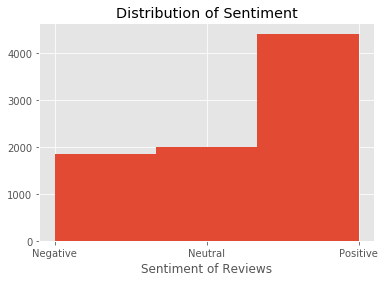

In [36]:
#change to numerical values
df11.to_csv('annotated_csv', sep='\t', encoding='utf-8') 
df11['polarity'] = df11.polarity.map(lambda x: int(2) if x =='positive' else int(0) if x =='negative' else int(1) if x == 'neutral' else np.nan)
print(df11['polarity'].value_counts())
print(df11)
plt.hist(df11.polarity, bins = 3, align= 'mid')
plt.xticks(range(3), ['Negative','Neutral', 'Positive'])
plt.xlabel('Sentiment of Reviews')
plt.title('Distribution of Sentiment')
plt.show()

In [37]:
df12=df11.sample(n=9138, replace=True, random_state=1)
print(df12.shape)

(9138, 2)


In [38]:
x=df12['tokenized_sents']
y=df12['polarity']
seed =7
np.random.seed(seed)
maximumlen=420 #maximum tweet length(no of words)
# Truncate and pad the review sequences
#Convert words to integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df12['tokenized_sents'].values)
x = tokenizer.texts_to_sequences(df12['tokenized_sents'].values)
vocab_size = len(tokenizer.word_index) + 1 
print("vocab_size",vocab_size)
#print(wordtoint)
#padding sequences to maximum length tweet
#x = pad_sequences(wordtoint, maxlen=maximumlen)
#print(x.shape) 
X = pad_sequences(x,maxlen=maximumlen)
print(X.shape[0])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=seed)#validation data
x_train=pad_sequences(x_train, maxlen=maximumlen)
x_test=pad_sequences(x_test, maxlen=maximumlen)
#padding x_val to maximum length
x_val=pad_sequences(x_val, maxlen=maximumlen)
print(x_train)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
model2 = gensim.models.Word2Vec(df11['tokenized_sents'],min_count = 1, size = 32,window = 5, sg = 1,iter=20,max_vocab_size=24200,seed=7) 
print(model2)
#model2.save('w2v.model')
#print(model2.similarity('·å•·à©','·àù·à≠·å•'))
#print(model2.similarity('üíö','üíã'))
#print(model2.wv.most_similar('üíã'))
#print(model2.vector_size)
#pretrained_weights = model2.wv.syn0

vocab_size 11905
9138
[[   0    0    0 ... 8954 8955  386]
 [   0    0    0 ...   49  481 5350]
 [   0    0    0 ... 9469   60 9470]
 ...
 [   0    0    0 ... 2021    9   62]
 [   0    0    0 ... 6362 4538  871]
 [   0    0    0 ...    0    0   20]]
(6579, 420)
(914, 420)
(6579,)
(914,)
Word2Vec(vocab=12997, size=32, alpha=0.025)


None
Train on 6579 samples, validate on 1645 samples
Epoch 1/8
 - 80s - loss: 1.0426 - acc: 0.5197 - val_loss: 1.0133 - val_acc: 0.5307
Epoch 2/8
 - 78s - loss: 0.8794 - acc: 0.5928 - val_loss: 0.6117 - val_acc: 0.7611
Epoch 3/8
 - 88s - loss: 0.5572 - acc: 0.7445 - val_loss: 0.4421 - val_acc: 0.8158
Epoch 4/8
 - 84s - loss: 0.4411 - acc: 0.8044 - val_loss: 0.4019 - val_acc: 0.8365
Epoch 5/8
 - 85s - loss: 0.3789 - acc: 0.8328 - val_loss: 0.3636 - val_acc: 0.8657
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 420, 8)            120000    
_________________________________________________________________
lstm_6 (LSTM)                (None, 420, 8)            544       
_________________________________________________________________
dropout_11 (Dropout)         (None, 420, 8)            0         
_________________________________________________________________
flat

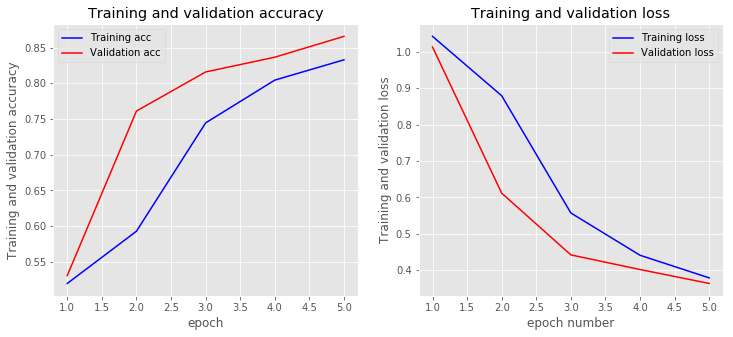

In [52]:
topwords=15000 #top words to consider
epoch=8         
batch=14
seed=7
embedding_size = 8
model=Sequential()
np.random.seed(0)
model.add(Embedding(topwords,8,input_length=maximumlen,dropout=0.5))
def lstm():
    model.add(LSTM(8,return_sequences=True,input_shape=(x_train.shape[0],x_train.shape[1])))
    model.add(Dropout(0.7))
    #model.add(LSTM(4,activation='softmax',return_sequences=True))
    model.add(Flatten())
    model.add(Dense(16, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
def bilstm():
    model.add(Bidirectional(LSTM(8,return_sequences=True,input_shape=(x_train.shape[0],x_train.shape[1]),
                                 dropout=0.7,recurrent_dropout=0.5)))
    #model.add(Dropout(0.7))
    model.add(Bidirectional(LSTM(8,return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(16,activation= 'sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(3,activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
def cnn():
    lstm_out = 8
    model.add(Conv1D(filters=64, kernel_size=5, activation='sigmoid', padding='causal'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.7))
    model.add(LSTM(units=lstm_out))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
def default():
    return "Incorrect model"
switcher = {
    1: lstm,
    2: bilstm,
    3: cnn
    }
def switch(choice):
    return switcher.get(choice, default)()
print(switch(1))
history=model.fit(x_train, y_train,validation_data=(x_val,y_val),epochs=epoch,batch_size=batch,verbose=2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, baseline=0.3)])
print(model.summary()) 
loss, accuracy = model.evaluate(x_test, y_test,verbose = 2, batch_size=batch) 
print("Training Accuracy: {:.4f}".format(accuracy))
plt.style.use('ggplot')
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('epoch')
    plt.ylabel('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('epoch number')
    plt.ylabel('Training and validation loss')
    plt.legend()
plot_history(history)

In [58]:
# predict probabilities for test set
yhat_probs = model.predict(x_test, verbose=0)
yhat_probs = np.array([np.argmax(pred) for pred in yhat_probs])
# predict crisp classes for test set
yhat_classes = model.predict_classes(x_test, verbose=0)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes,normalize=True)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes,labels=[0,1,2],average='macro') #average='micro' gives total score of Tp/tp+fp none gives each class precision
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes,labels=[0,1,2],average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes,labels=[0,1,2],average='macro')
print('F1 score: %f' % f1)
# confusion matrix
matrix = confusion_matrix(y_test,yhat_classes,labels=[0,1,2])
print(matrix)

Accuracy: 0.862144
Precision: 0.823090
Recall: 0.821350
F1 score: 0.820519
[[162  35   2]
 [ 52 158  22]
 [  5  10 468]]


In [41]:
'''
f= open("ture.csv","w+")
fulll=[]
for i in range(len(df11.index)):
    x=df11.iat[i,0]
    full = ' '.join(x)
    f.write(full)
    f.write('\n')
f.close()
f=open("ture.csv","r")
df=pd.read_csv('ture.csv',delimiter=';',names=['text'],encoding="utf-8")
all=pd.DataFrame(df)
vectorizer=CountVectorizer()
# #Finding the bigram representation 
bigram_vectorizer=CountVectorizer(ngram_range=(1,2),max_features=24200)
X=bigram_vectorizer.fit_transform(df['text']).toarray()
print(X.shape)
y=df11['polarity'].astype('int')
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 7)
model =MultinomialNB()
model.fit(X_train, y_train)
expected = y_test
predicted = model.predict(X_test)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
print("Accuracy:",metrics.accuracy_score(expected, predicted))
n=X_test.shape[0]
error=np.sum(y_test!=predicted)
error=error*100
error=error/float(n)
print(error)
'''

'\nf= open("ture.csv","w+")\nfulll=[]\nfor i in range(len(df11.index)):\n    x=df11.iat[i,0]\n    full = \' \'.join(x)\n    f.write(full)\n    f.write(\'\n\')\nf.close()\nf=open("ture.csv","r")\ndf=pd.read_csv(\'ture.csv\',delimiter=\';\',names=[\'text\'],encoding="utf-8")\nall=pd.DataFrame(df)\nvectorizer=CountVectorizer()\n# #Finding the bigram representation \nbigram_vectorizer=CountVectorizer(ngram_range=(1,2),max_features=24200)\nX=bigram_vectorizer.fit_transform(df[\'text\']).toarray()\nprint(X.shape)\ny=df11[\'polarity\'].astype(\'int\')\nprint(y.shape)\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 7)\nmodel =MultinomialNB()\nmodel.fit(X_train, y_train)\nexpected = y_test\npredicted = model.predict(X_test)\nprint(metrics.classification_report(expected, predicted))\nprint(metrics.confusion_matrix(expected, predicted))\nprint("Accuracy:",metrics.accuracy_score(expected, predicted))\nn=X_test.shape[0]\nerror=np.sum(y_test!=predicted)\ner

[[161  36   2]
 [ 57 157  18]
 [  5  10 468]]


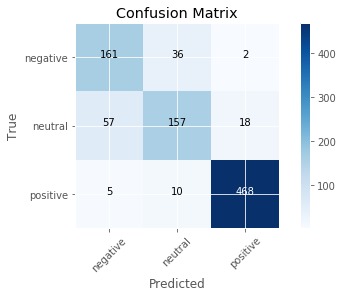

In [42]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True')
    plt.xlabel('Predicted')
# plot the confusion Matrix
cm = confusion_matrix(y_test,yhat_classes)
plot_confusion_matrix(cm, {'negative': 0, 'neutral':1,'positive':2})